## Analyzing and Visualizing Loan Data

##### by (Junwei Tan)

In [2]:
##### This is a typical bank loan data. I will complete the data analysis from the perspective as the bank management or the investors, so the motivation for the analysis is based on the perspective of how to make the bank doing better in the future.

In [75]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://www.asapmortgageinc.com/wp-content/uploads/2019/06/15versus30.jpg")

 
### __[Dataset](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True)__ Detail
<div class="alert alert-block alert-info">
This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set.  I am not explore all of the variables in the dataset! Only focus exploration on about 3 or 5 of them.
</div>



### Steps of Analysis
 - Preliminary Wrangling/Data Cleaning
 - Biavariate Exploration
 - Multivariate Exploration
 - Observation & thought
 - Reference

### Preliminary Wrangling / Data Cleaning /Data Structure / Data Distribution Status

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

In [77]:
df=pd.read_csv('/Users/balance/Desktop/prosperLoanData.csv')

In [78]:
df.shape

(113937, 81)

##### Data Cleaning

In [79]:
### find out how many column and what is the datatype fot each column.
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [80]:
### count the NaN value for each column
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [95]:
NanCount.index.values

array(['ListingKey', 'ListingNumber', 'ListingCreationDate',
       'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months',
       'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'RevolvingCreditBalance',
       'BankcardUtiliza

In [96]:
NanCount

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### here are the list for those coloum has null value

In [576]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ListingKey - 0%
ListingNumber - 0%
ListingCreationDate - 0%
CreditGrade - 75%
Term - 0%
LoanStatus - 0%
ClosedDate - 52%
BorrowerAPR - 0%
BorrowerRate - 0%
LenderYield - 0%
EstimatedEffectiveYield - 26%
EstimatedLoss - 26%
EstimatedReturn - 26%
ProsperRating (numeric) - 26%
ProsperRating (Alpha) - 26%
ProsperScore - 26%
ListingCategory (numeric) - 0%
BorrowerState - 5%
Occupation - 3%
EmploymentStatus - 2%
EmploymentStatusDuration - 7%
IsBorrowerHomeowner - 0%
CurrentlyInGroup - 0%
GroupKey - 88%
DateCreditPulled - 0%
CreditScoreRangeLower - 1%
CreditScoreRangeUpper - 1%
FirstRecordedCreditLine - 1%
CurrentCreditLines - 7%
OpenCreditLines - 7%
TotalCreditLinespast7years - 1%
OpenRevolvingAccounts - 0%
OpenRevolvingMonthlyPayment - 0%
InquiriesLast6Months - 1%
TotalInquiries - 1%
CurrentDelinquencies - 1%
AmountDelinquent - 7%
DelinquenciesLast7Years - 1%
PublicRecordsLast10Years - 1%
PublicRecordsLast12Months - 7%
RevolvingCreditBalance - 7%
BankcardUtilization - 7%
AvailableBankcardCr

In [97]:
### count the duplicate columns
df.duplicated().sum()

0

In [98]:
### Change the name for those columns has query unfriendly format
df1=df.rename(columns={'ProsperRating (Alpha)':'ProsperRating_A','ProsperRating (numeric)':'ProsperRating_n'})

##### counts and see the data structure.

In [99]:
df1.ProsperRating_A.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating_A, dtype: int64

In [100]:
df1.ProsperRating_n.value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating_n, dtype: int64

In [101]:
df1.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [102]:
df1.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [103]:
df1.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [104]:
df1.DebtToIncomeRatio.value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.13774       1
0.04983       1
0.15248       1
0.19893       1
0.06056       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

In [105]:
df1.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

##### change the datatype to correct type

In [106]:
df2=df1.copy()

df2['ProsperRating_A']=df2['ProsperRating_A'].astype('category')
df2['LoanStatus']=df2['LoanStatus'].astype('category')
df2['EmploymentStatus']=df2['EmploymentStatus'].astype('category')
df2['IncomeRange']=df2['IncomeRange'].astype('category')
df2['Term']=df2['Term'].astype('category')


In [107]:
## look deep to those data which i am interested. 

In [109]:
## Remove the row not usaful for data analysis.

In [110]:
df2=df2.drop(columns=['ListingCreationDate',
                 'CurrentlyInGroup','GroupKey','DateCreditPulled',
                 'TotalInquiries','LoanKey','LoanNumber','MemberKey',
                 'LP_CustomerPayments','LP_CustomerPrincipalPayments',
                  'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees'
                 ,'LP_CollectionFees','LP_GrossPrincipalLoss',
                 'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments'
                 ,'PercentFunded','Investors'])

In [111]:
### remove the time from LoanOrigiantionDtate
df2['LoanDate']=pd.to_datetime(df2['LoanOriginationDate']).dt.date

In [112]:
df2.shape

(113937, 64)

In [113]:
### ProsperRating is very inportment aspect in reviwing loan in my opinion
df2['ProsperRating_n'].describe()

count    84853.000000
mean         4.072243
std          1.673227
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating_n, dtype: float64

##### find out whether the data is distribued or not

<Figure size 841.68x595.44 with 0 Axes>

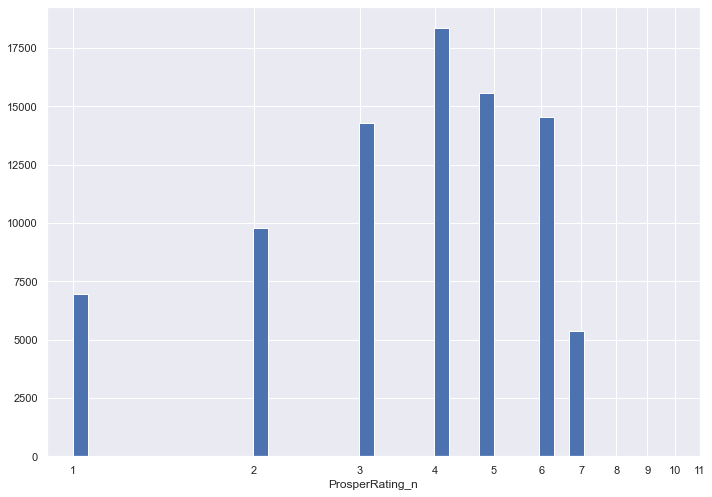

In [114]:
plt.figure(figsize=(11.69, 8.27))
## the data(ProsperRating_n) looks distribued.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df2['ProsperRating_n'].max())+log_binsize, log_binsize)

plt.figure(figsize=(11.69, 8.27))
plt.hist(data = df2, x = 'ProsperRating_n', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8,9,10,11], [1, 2, 3, 4, 5, 6, 7, 8,9,10,11]);
plt.xlabel('ProsperRating_n');

In [115]:
## look through another way, look distrubued.

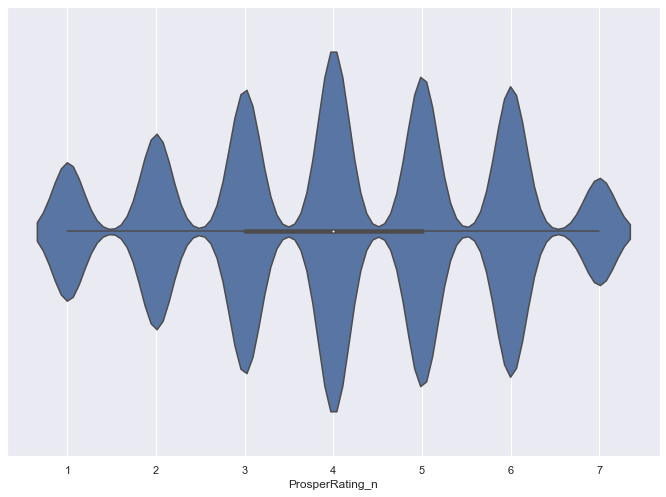

In [120]:
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data = df2, x = 'ProsperRating_n',facecolor='gray');

<AxesSubplot:xlabel='LoanOriginalAmount'>

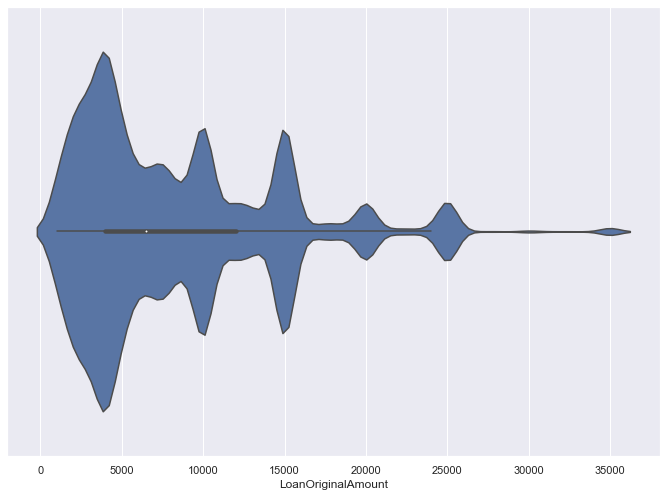

In [124]:
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data=df2,x='LoanOriginalAmount')

In [125]:
df2.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [126]:
## Remove outliner 
df2=df2[df2['LoanOriginalAmount']<=27000]

<AxesSubplot:xlabel='LoanOriginalAmount'>

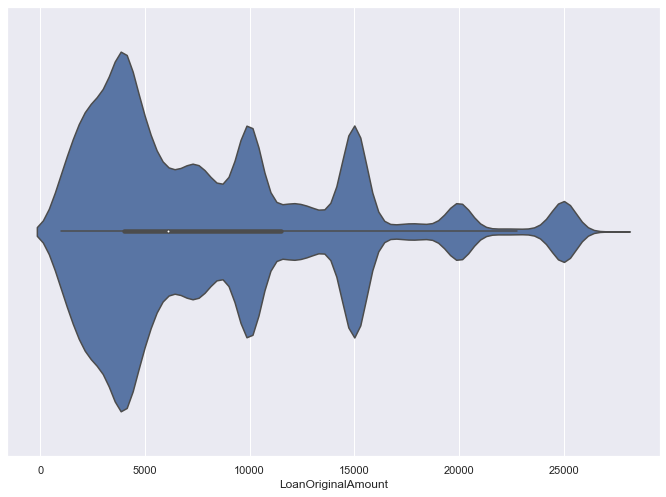

In [127]:
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data=df2,x='LoanOriginalAmount')

<AxesSubplot:xlabel='BorrowerAPR'>

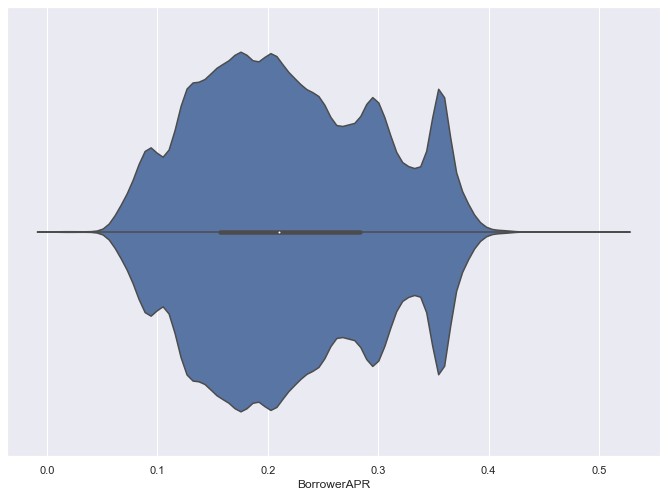

In [128]:
### BorrowerAPR look good to me
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data=df2,x='BorrowerAPR')

<AxesSubplot:xlabel='EstimatedReturn'>

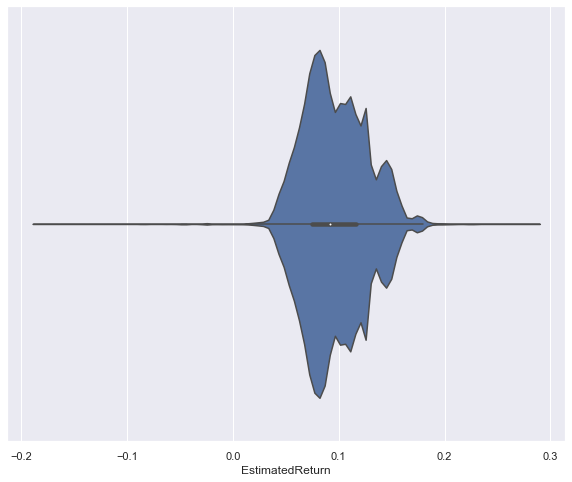

In [129]:
plt.figure(figsize=(10,8))
sb.violinplot(data=df2,x='EstimatedReturn')

In [130]:
df2=df2[(df2['EstimatedReturn']<0.2) & (df['EstimatedReturn'] > 0)]



# df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='EstimatedReturn'>

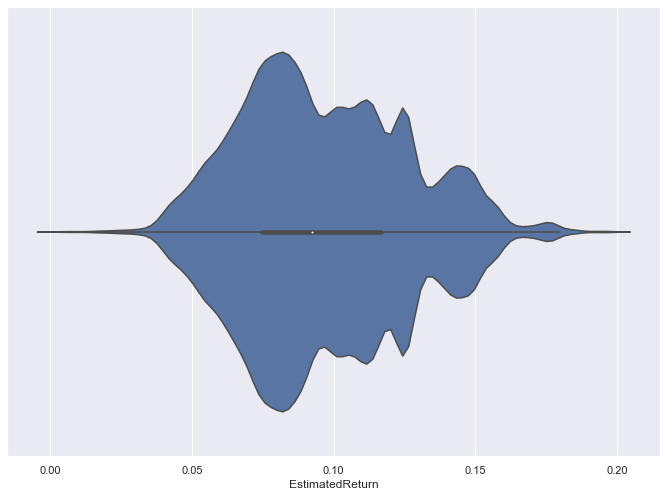

In [131]:
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data=df2,x='EstimatedReturn')

In [581]:
df2.shape

(83923, 86)

## What is the structure of you dataset ?
### The loan dataset(after cleaning) contains 83923 observations of 86 variable. 

## What are the main factors/features of interest in this dataset ?
### The purpose of the report has two focus 
### First: The bank needs a pre-approve model to determine whether the application will fall in 'bad loan' category, what is the potential return from this loan. Hope this report can provide a basic reference for this pre-approve system no matter from the model or basic data analysis 
### Second: I hope this report can be used as a reference for periodic business summary, to review business situation from a macro or micro perspective, and find out the factors that affect the business (where, who, when, what), so the management can adjust the in time.
#### Because my report will be focus on how to improve the bank performance, so i will use more performance related feature inhere are the questions i try to find out from the report my anasis. here are the questions i try to find out from the report :
### 1. What factors affect the estimate return, 
### 2. What factors caused the bad loan.

<div class="alert alert-block alert-info">
By looking at the data, i selected the columns below for use to analyze : </div>
    
    - EstimateReturn, 
    - Term, 
    - LoanStatus, 
    - EmploymentStatus, 
    - CurrentDelinquencies,
    - IncomeRange, 
    - StatedMonthly Income, 
    - Loan Original, 
    - LoanOriginal Date.

## Univariate Exploration

### I am going to run some counts plots for better understanding the structure for each category.Let's count the feature which i am interest from data

Text(0.5, 1.0, 'The listing loans counted by Loan Status')

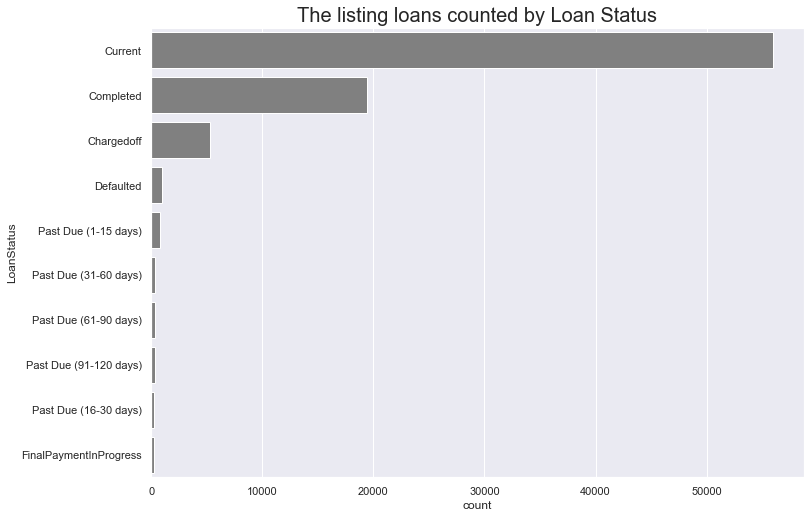

In [132]:
### Counting by LoanStatus


plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanStatus',data=df2,order=df2.LoanStatus.value_counts().iloc[:10].index,
            facecolor='gray')
plt.title('The listing loans counted by Loan Status',fontsize=20)

In [583]:
df2.LoanStatus.value_counts().iloc[:1].sum()/df2.LoanStatus.value_counts().sum()

0.666622975823076

### the result shows the bad loan ratio cpmparely low, the loan still active has almost 67% of total loan

Text(0.5, 1.0, 'The listing loan counted by Occupations')

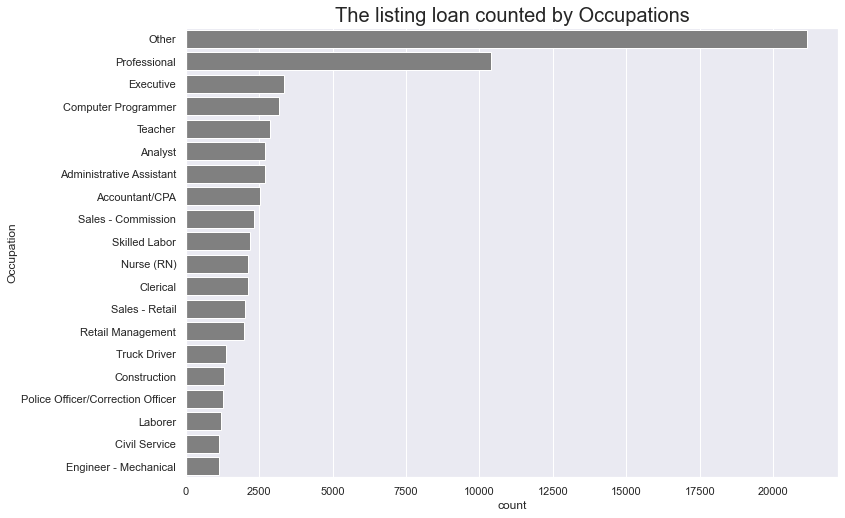

In [133]:
### counting by occupations 

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='Occupation',data=df2,order=df2.Occupation.value_counts().iloc[:20].index,
            facecolor='gray')
plt.title('The listing loan counted by Occupations',fontsize=20)

### other occupations has the most counts compare to the rest, but it doesn' help the bank to identifiy those customer, more detal needed when KYC cusotmers in the future.

Text(0.5, 1.0, 'The listing Loan counted by Income Range')

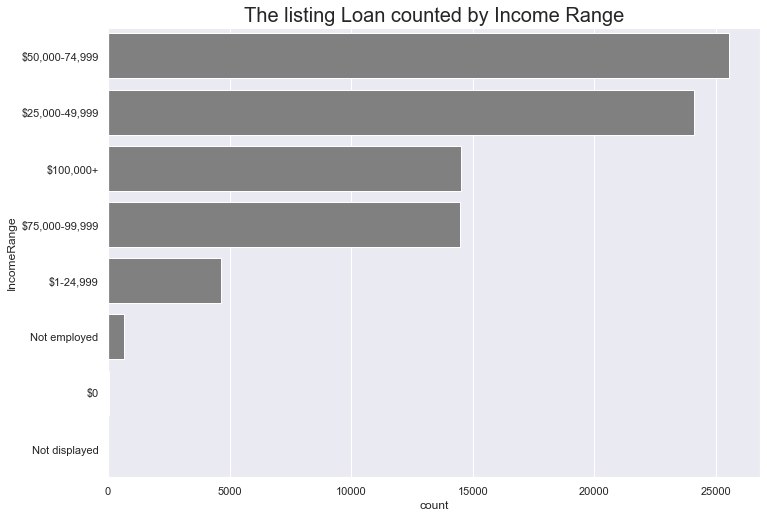

In [134]:
### counting by Income Range

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='IncomeRange',data=df2,order=df2.IncomeRange.value_counts().iloc[:15].index,
            facecolor='gray')
plt.title('The listing Loan counted by Income Range',fontsize=20)

In [278]:
## calculate the presentage for the top 2 incom range customers.
df2.IncomeRange.value_counts()

$50,000-74,999    25544
$25,000-49,999    24086
$100,000+         14515
$75,000-99,999    14462
$1-24,999          4630
Not employed        642
$0                   44
Not displayed         0
Name: IncomeRange, dtype: int64

In [303]:
## 1. calculate mean for 5 years median income , 2. calculate the top 2 percentage for total counts 3. high income percentage of total counts
(57412+55520+52673+54569+56479+55613+58476)/7,(25544+24086)/(25544+24086+14515+14462+4630+642+44), df2.IncomeRange.value_counts().iloc[2:4].sum()/df2.IncomeRange.value_counts().sum()

(55820.28571428572, 0.5913754274751856, 0.345280793107968)

### according to census depart, the median income from 2008 to 2014 was list above,  so the median fo those 7 years is $55820. in conclution, almost 60% of loan were low or median income range, they are the core cusotmers.  34% are high income customers

Text(0.5, 1.0, 'The listing Loan counted by States')

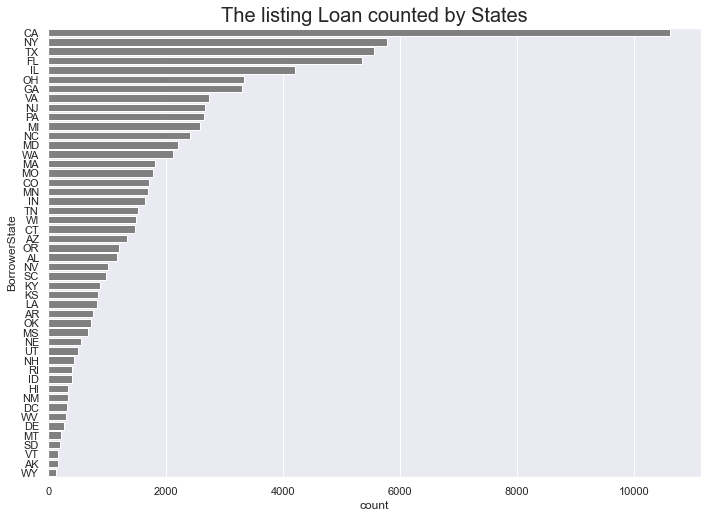

In [135]:
## counting by states

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='BorrowerState',data=df2,order=df2.BorrowerState.value_counts().iloc[:50].index,
            facecolor='gray')
plt.title('The listing Loan counted by States',fontsize=20)

In [304]:
## calculate the top presentage of the top state.

df2.BorrowerState.value_counts().iloc[:1].sum()/df2.BorrowerState.value_counts().sum(), df2.BorrowerState.value_counts().iloc[:5].sum()/df2.BorrowerState.value_counts().sum()

(0.12641349808753263, 0.37555854771635905)

### california has more than 12% percentage counts , the top 5 big states has more than 37% percentage counts 

Text(0.5, 1.0, 'The listing Loan counted by Term')

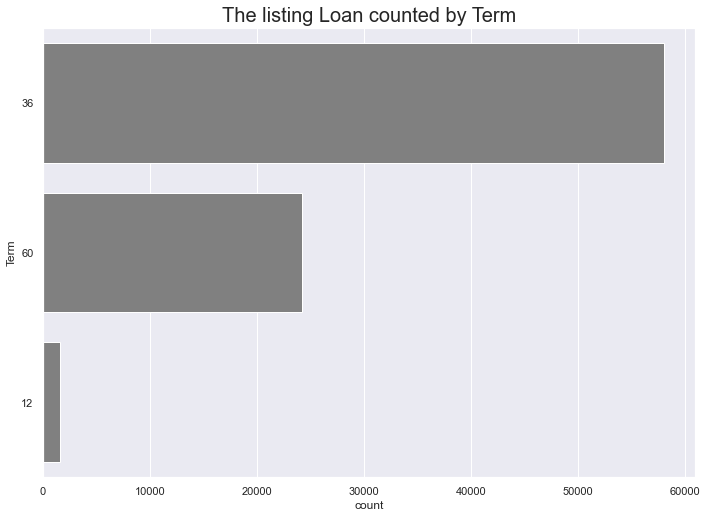

In [136]:
## Counting by term

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='Term',data=df2,order=df2.Term.value_counts().iloc[:5].index,
            facecolor='gray')
plt.title('The listing Loan counted by Term',fontsize=20)

In [137]:
df_PRating=df2.ProsperRating_n.value_counts()

In [305]:
## calculate the presentage of the Top term loan 

df2.Term.value_counts().iloc[:1].sum()/df2.Term.value_counts().sum()

0.692205950692897

### Around 70% loan are committed to 36 months.

Text(0.5, 1.0, 'The listing Loan counted by different ProsperRating')

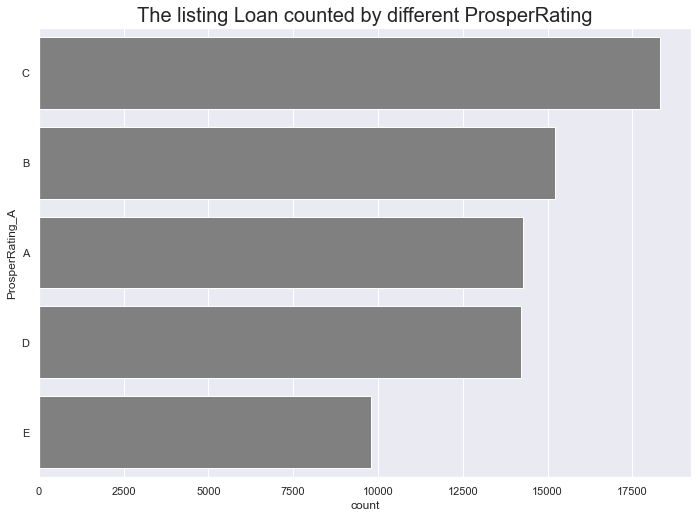

In [138]:
## counts by ProsperRating/ Alphabetical

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='ProsperRating_A',data=df2,order=df2.ProsperRating_A.value_counts().iloc[:5].index,
            facecolor='gray')
plt.title('The listing Loan counted by different ProsperRating',fontsize=20)

In [398]:
df2.ProsperRating_A.value_counts().iloc[:1].sum()/df2.ProsperRating_A.value_counts().sum()

0.21822384805118977

### Prosper Rating C has most customers, Almost 22%

Text(0.5, 1.0, 'The listing Loan counted by Quarter')

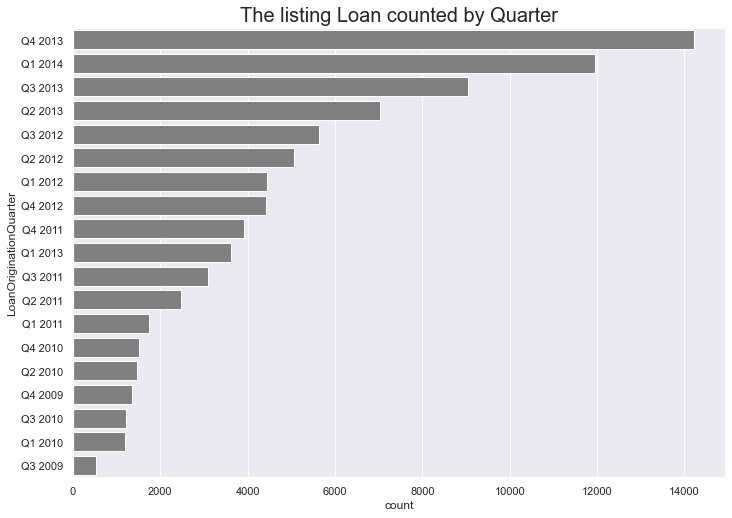

In [200]:
### counts by quater
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanOriginationQuarter',data=df2,order=df2.LoanOriginationQuarter.value_counts().iloc[:30].index,
            facecolor='gray')
plt.title('The listing Loan counted by Quarter',fontsize=20)

Text(0.5, 1.0, 'The listing Loan counted by Quarter')

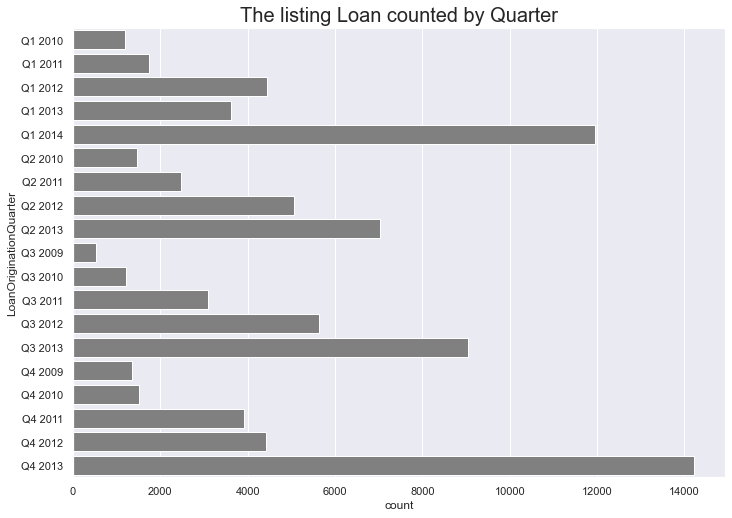

In [325]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanOriginationQuarter',data=df2,order=df2.LoanOriginationQuarter.value_counts().sort_index(axis=0).iloc[:30].index,
            facecolor='gray')
plt.title('The listing Loan counted by Quarter',fontsize=20)

In [366]:
df2.LoanOriginationQuarter.value_counts().sort_index(axis=0,inplace=True,na_position='first')

Text(0.5, 1.0, 'The listing Loan counted by Quarter')

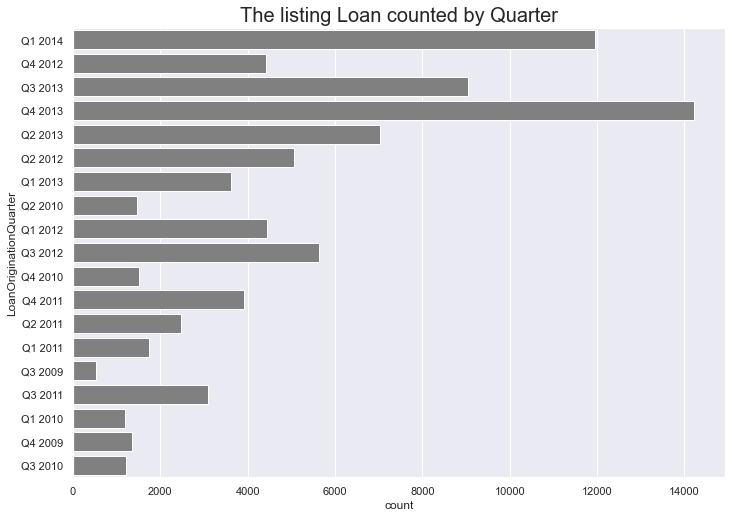

In [370]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanOriginationQuarter',data=df2,order=df2.LoanOriginationQuarter.value_counts().sort_index(inplace=True),
            facecolor='gray')
plt.title('The listing Loan counted by Quarter',fontsize=20)

### the above 3 plot trying to demonstrade the listing loan, the listing number go up chronologically. q4 2013 had meet tht highest number

### Different types of data can vary greatly. For example, some states's(likes California,Texas)loan originated total number are way more than others. Also like certain loan with specifit occupations type(like:Other) also has large portions than others. So the plots listed above give us a clearer picture to review and select our data

## These are the 'Key Words'  represent the heaviest dataset that occupation very large portions of its type.

Text(0.5, 1.0, 'The Keywords/sinificant based on amount counted')

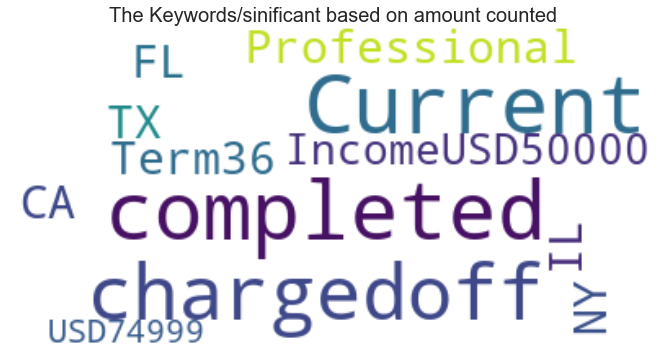

In [140]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
text=('Current,completed,chargedoff, Other,Professional, CA, TX, NY, FL,IL, Term36,IncomeUSD50000-USD74999')
wordcloud = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
plt.figure(figsize=(11.69, 8.27))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show
plt.title('The Keywords/sinificant based on amount counted',fontsize=20)

# Bivariate Exploration

### Now let’s dive in to find out the factors/feature that affect the loan outcome, and the outcome affecting the estimate return.

#### 1.	Here are the features I will pick up for revieing the correlation with the outcome of bad/good loan.  Ownership/original amount, current delinquent/prosper rating / income/Debt to income ratio.
#### 2.	Here are the features I selecting for reviewing the correlation with estimate return.  State, occupations, prosper rating, Loan Listing time.

## Estimate Return and Loan Status are the most pay attention features i will focus on,so the other factors will apply to Estimate income and Loan Status

Text(0.5, 1.0, 'Correlation between LoanStatus and ProsperRating')

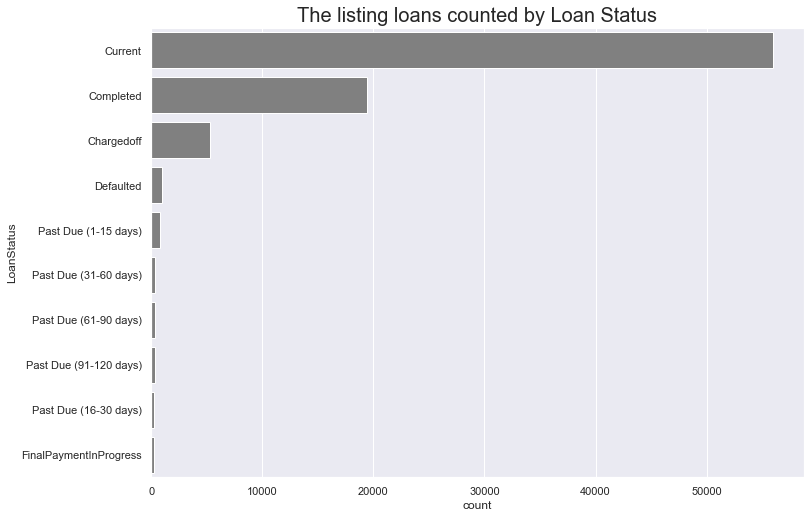

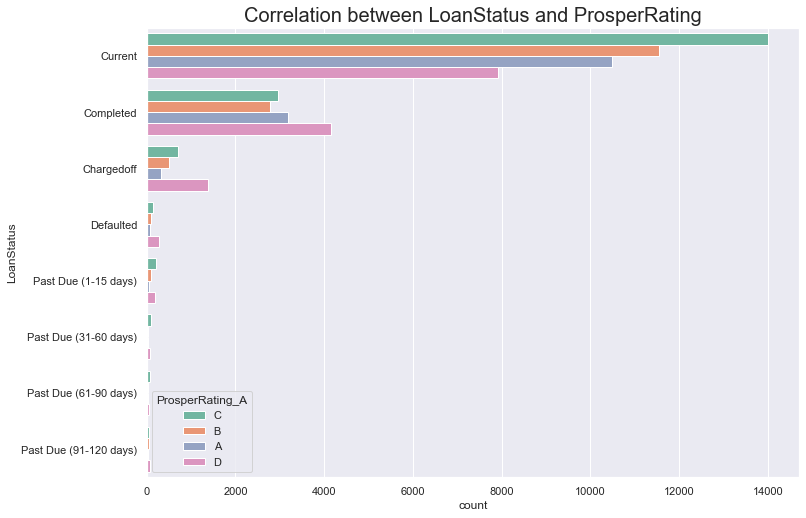

In [506]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanStatus',data=df2,order=df2.LoanStatus.value_counts().iloc[:10].index,
            facecolor='gray')
plt.title('The listing loans counted by Loan Status',fontsize=20),
## count the originated loan for different Loan Status with different ProsperRating.

plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanStatus',hue='ProsperRating_A',data=df2,order=df2.LoanStatus.value_counts().iloc[:8].index,
           hue_order=df2.ProsperRating_A.value_counts().iloc[:4].index,palette = "Set2" )
plt.title('Correlation between LoanStatus and ProsperRating',fontsize=20)

In [584]:
## Here we categorized earning into two level , good and poor. find out the mean and split the data away
df2.EstimatedReturn.describe()

count    83923.000000
mean         0.096469
std          0.029352
min          0.001300
25%          0.074630
50%          0.092200
75%          0.116800
max          0.198500
Name: EstimatedReturn, dtype: float64

In [ ]:

bin_edges1=[0,0.096469,0.1985]
bin_names1=['Poor Earning','Good Earning']

df2["Earning"]=pd.cut(df2['EstimatedReturn'],bin_edges1,labels=bin_names1)
# fig.set_size_inches(16,13)
#sns.catplot(x="Occupation",y="EstimatedReturn",hue="Good Loan",kind="bar",dodge=True,aspect=5,
 #           data=df2,order=df2.Occupation.value_counts().iloc[:15].index)

Text(0.5, 1.0, 'counts for Estimate Earning of different loan status')

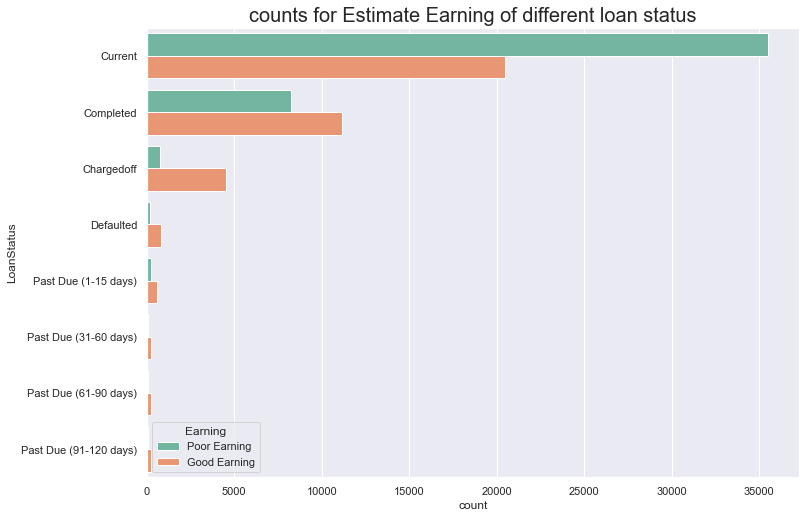

In [512]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='LoanStatus',hue='Earning',data=df2,order=df2.LoanStatus.value_counts().iloc[:8].index,palette = "Set2" )
plt.title('counts for Estimate Earning of different loan status',fontsize=20)

###  Prosper Rating C leading number for the current existing customer, but suprisely almost 1/3 current loan are poor estimate loan. but if your loan is chargedoff or completed, those loan are higher chance good earning loan

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

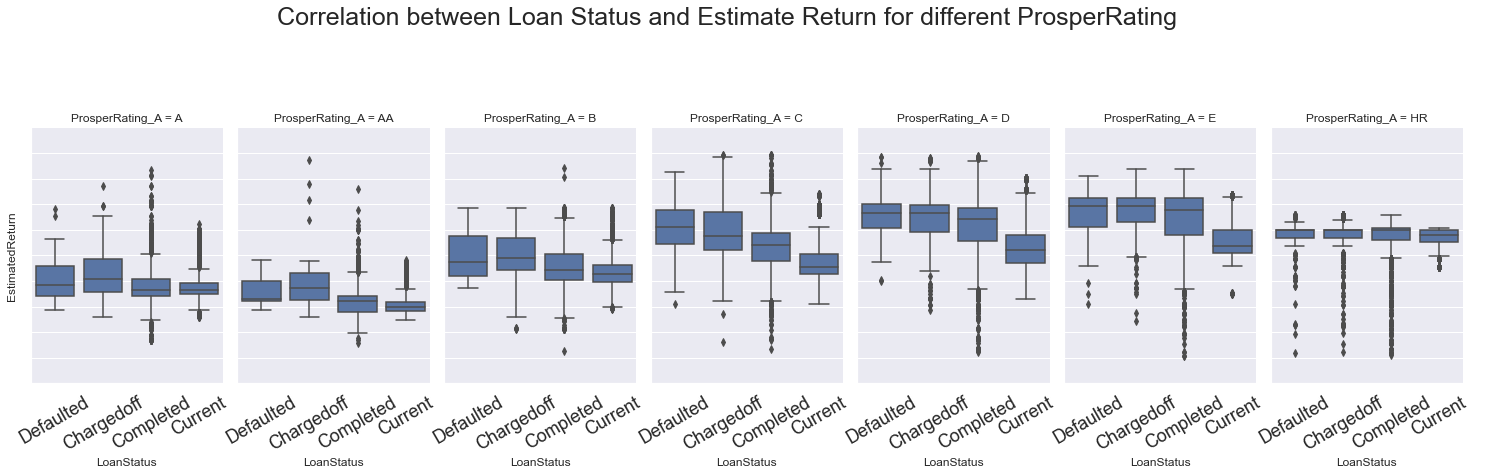

In [527]:
# plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplots_adjust(hspace=1.0,wspace=1.5)
g=sb.FacetGrid(data=df2, col='ProsperRating_A', size=6,aspect=0.5)
g.map(sb.boxplot,'LoanStatus','EstimatedReturn',order=['Defaulted','Chargedoff','Completed','Current'])
g.set_xticklabels(rotation=30,fontsize=18)
g.set_yticklabels(fontsize=25)
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Correlation between Loan Status and Estimate Return for different ProsperRating',fontsize=25)
g.add_legend()

#plt.title('Correlation between Loan Status and Estimate Return for different ProsperRating',fontsize=35)

### Prosper Rating C D and E has higher Estimate Return compare to other rating. defaulted and charged off status have higher estimate return if you are in the same prosper rating category.

Text(0.5, 1.0, 'Debit to Income Ratio in different states')

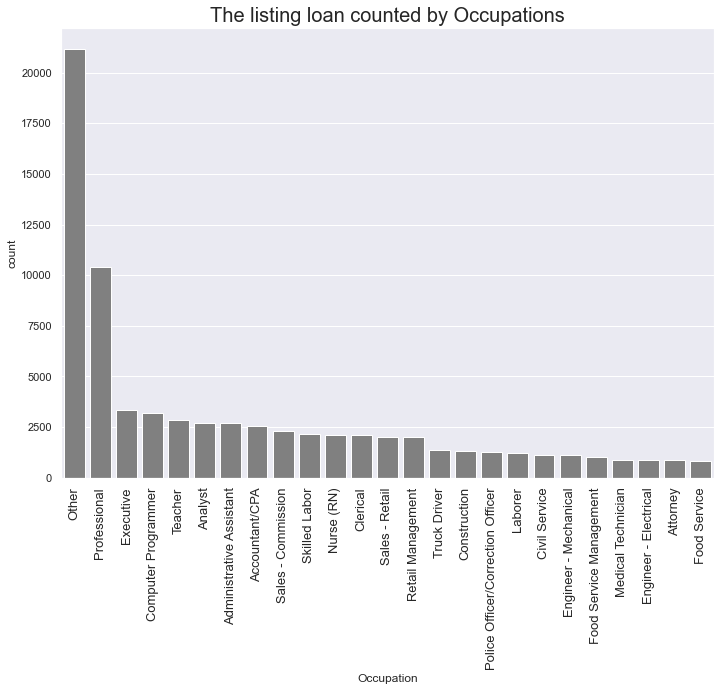

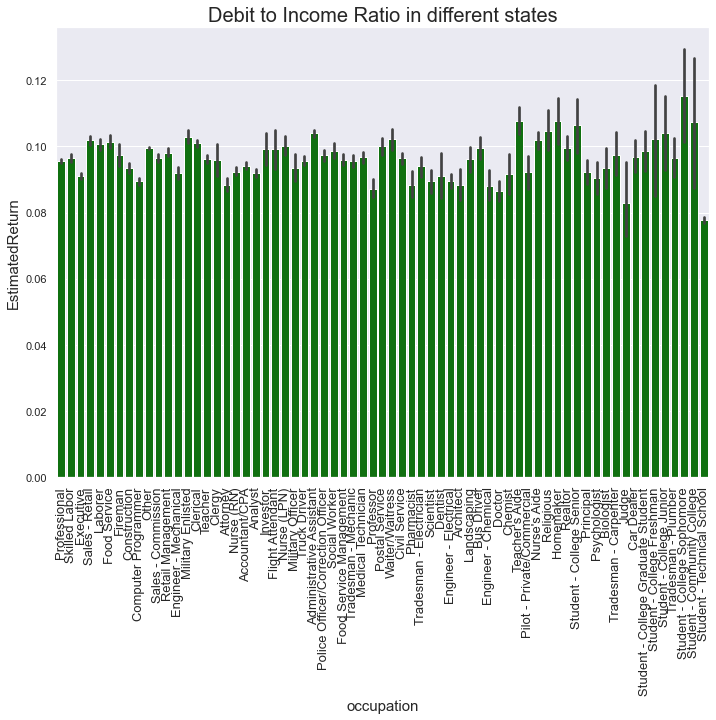

In [510]:
### counting by occupations 

plt.figure(figsize=(11.69, 8.27))
sb.countplot(x='Occupation',data=df2,order=df2.Occupation.value_counts().iloc[:25].index,
            facecolor='gray')
plt.xticks(rotation=90,fontsize=13)
plt.title('The listing loan counted by Occupations',fontsize=20)
,


## see the different of  Debit to Income Ratio by States.

plt.figure(figsize=(11.69, 8.27))
# plt.legend(fontsize=50)

# base_color = sb.color_palette()[1]
sb.barplot(data=df2, x='Occupation', y='EstimatedReturn', color='green')

# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# plt.tick_params(labelsize=11)

plt.xlabel("occupation",fontsize=15,alpha=2.0)
plt.ylabel("EstimatedReturn",fontsize=15)
plt.xticks(rotation=90,fontsize=13)

for ax in plt.gcf().axes:
    plt.sca(ax)
plt.xlabel(ax.get_xlabel(),rotation=0)
plt.title('Debit to Income Ratio in different states',fontsize=20)




### occupation doesn't affect the estiamte income

Text(0.5, 1.0, 'counts for Estimate Earning of different occupations')

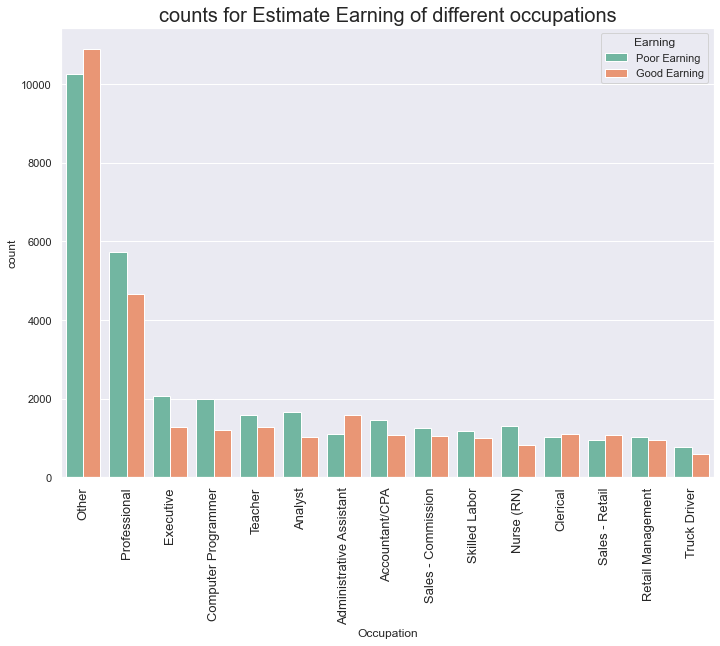

In [518]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(x='Occupation',hue='Earning',data=df2,order=df2.Occupation.value_counts().iloc[:15].index,palette = "Set2" )
plt.xticks(rotation=90,fontsize=13)
plt.title('counts for Estimate Earning of different occupations',fontsize=20)

### eventhou i slit the performance into only two level, it telling us loan estimate incom doesn't relate with what customers occupations. good earning and not good earning half and half

In [519]:

df2["Good Loan"]=df2["LoanStatus"].isin(["Current","Completed","FinalPaymentInProgress"])
# fig.set_size_inches(16,13)
# sns.catplot(x="Occupation",y="EstimatedReturn",hue="Good Loan",kind="bar",dodge=True,aspect=5,
           # data=df2,order=df2.Occupation.value_counts().iloc[:15].index)

# plt.title('Correlation Between Occupations and Estimated Return for Good/Bad Loan',fontsize=35)

## Loan Status VS. Occupations

#### Here is the plot i Categorize loan status into Good/Not Good. the Chart showing the loan Good/bad ratio for all occupations. it looks like job doesn't affect loan status 

Text(0.5, 1.0, 'Good/Bad loan count for different occupations')

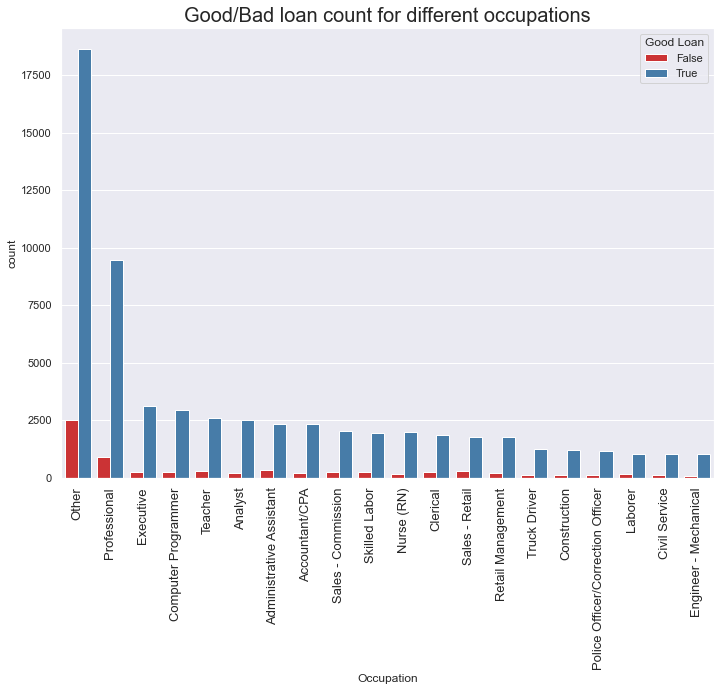

In [524]:
### Count Loan under differnt professional and prosperRaitng.
### Professsional plot is important because you will know the loan precentage from different occupation. and you can 
### tell the dynamic of the bank cusotmer base. it is a usually data for loan advertisement.

plt.figure(figsize=(11.69, 8.27))
sb.countplot(x='Occupation',hue='Good Loan',data=df2,order=df2.Occupation.value_counts().iloc[:20].index,palette="Set1")
plt.xticks(rotation=90,fontsize=13)
plt.title('Good/Bad loan count for different occupations',fontsize=20)

### the good/bad loan ratio distributed same among all occupations.

Text(0.5, 1.0, 'Correlation between Occupations and ProsperRating')

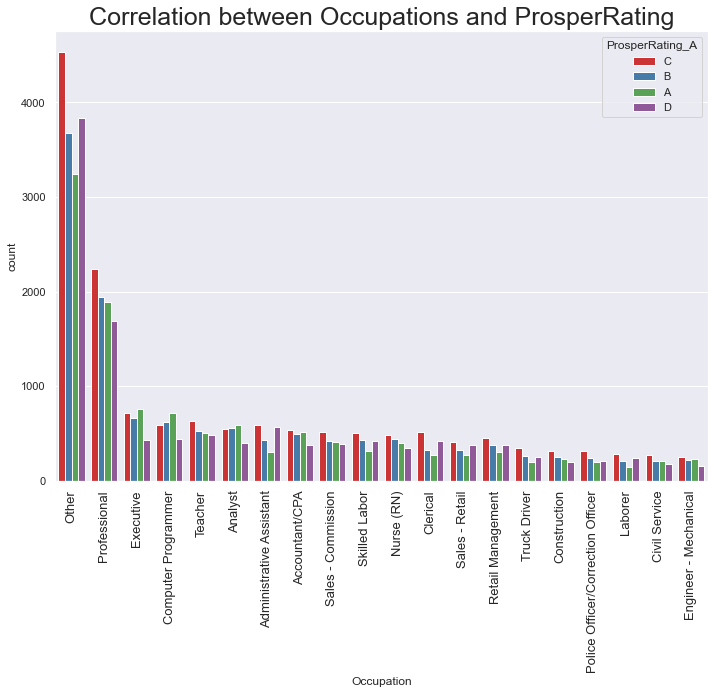

In [534]:
plt.figure(figsize=(11.69, 8.27))
df2.head(1)

sb.countplot(x='Occupation',hue='ProsperRating_A',data=df2,order=df2.Occupation.value_counts().iloc[:20].index,
           hue_order=df2.ProsperRating_A.value_counts().iloc[:4].index,palette="Set1")
plt.xticks(rotation=90,fontsize=13)

plt.title('Correlation between Occupations and ProsperRating',fontsize=25)

### Prosper Rating C leading all others rating in all occupations. but the distrubued ratio is almost same for all occupations

Text(0.5, 1.0, 'Correlation Between Occupations and Estimated Return for Good/Bad Loan')

<Figure size 841.68x595.44 with 0 Axes>

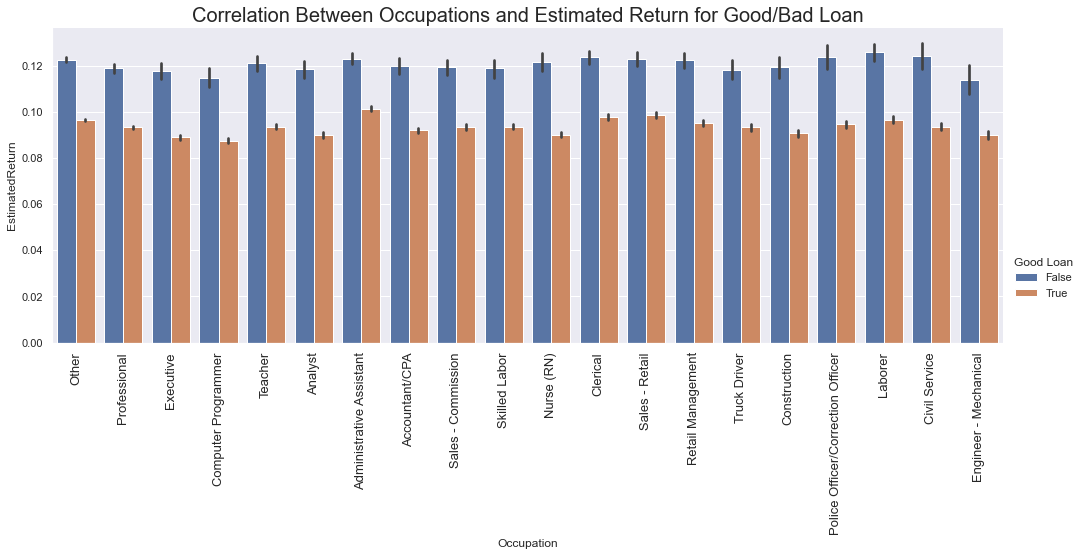

In [588]:
plt.figure(figsize=(11.69, 8.27))
sns.catplot(x="Occupation",y="EstimatedReturn",hue="Good Loan",kind="bar",dodge=True,aspect=2.8,
            data=df2,order=df2.Occupation.value_counts().iloc[:20].index)
plt.xticks(rotation=90,fontsize=13)

plt.title('Correlation Between Occupations and Estimated Return for Good/Bad Loan',fontsize=20)

### Here is the plot have there different feature togther, (loan status/occupations/estimate return). we can see the correlation for those three features. again, occupations has no much impact to loan status and restimaed return.

### i am going see the correlation amuont time and loan status/ estimate return

In [146]:
## 36 months is the most common regardless in which ProsperRating rating category.

## df2.groupby('LoanStatus')['ProsperRating_n'].value_counts().unstack().fillna(0)
## df2.groupby('LoanStatus')['ProsperRating_n'].apply(lambda x : x.ProsperRating_n.value_counts()).stack()

df2.groupby('Term')['ProsperRating_n'].value_counts().unstack().fillna(0)

ProsperRating_n,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Term,,,,,,,
12,0.0,288.0,295.0,264.0,316.0,269.0,181.0
36,6752.0,7606.0,9753.0,10150.0,8896.0,10457.0,4478.0
60,0.0,1894.0,4173.0,7900.0,6000.0,3553.0,698.0


### current loan has more precentage in all kind of rating, it make sence because current loan status cusotmer's number is much higher than other loan status

In [148]:
### Prosperrating_n presentage in LoanStatus(what is the Prosperrating_n ratio in Loans status),
### if the prosperrating_n is in 7.0, what is the 7.0 rateting presentage for each loan status
### all index combined should be = 1, calculate vertically.
pd.crosstab(df2['LoanStatus'],df2['ProsperRating_n']).apply(lambda r: r/r.sum(), axis=0)

ProsperRating_n,1.0,2.0,3.0,4.0,5.0,6.0,7.0
LoanStatus,,,,,,,
Chargedoff,0.173430,0.115550,0.097180,0.038331,0.032803,0.022831,0.011760
Completed,0.320646,0.255313,0.291963,0.161079,0.182553,0.223685,0.317342
Current,0.429502,0.567838,0.556923,0.764497,0.758349,0.734925,0.660071
Defaulted,0.030509,0.019718,0.019830,0.007317,0.005719,0.005533,0.003733
FinalPaymentInProgress,0.003110,0.003269,0.001969,0.002075,0.002564,0.002311,0.002427
Past Due (1-15 days),0.014662,0.013895,0.013361,0.011084,0.007100,0.004342,0.001307
Past Due (16-30 days),0.005924,0.005108,0.003727,0.003331,0.002892,0.000980,0.000560
Past Due (31-60 days),0.006961,0.006845,0.005907,0.005078,0.002169,0.001961,0.001307
Past Due (61-90 days),0.008590,0.005619,0.004078,0.004259,0.002498,0.001681,0.000373


### In Current Loan, more than 25% cusotmer has 4.0 rating, more than 20%(of it's total rating precentage) has 5.0 rating and 18% 6.0 rating, much higher than the loan in chargeoff, past due and defaulted.

In [149]:

###  LoanStatus presentage in Prosperrating_n (what is the Loans status in Prosperrating_n ratio ),
### if the chargedoff total has 7 prosperrating rating, what is the presentage for each prosperrating
### all index combined should be = 1, calculate horizontally.

LoanStatus_PRating=pd.crosstab(df2['LoanStatus'],df2['ProsperRating_n']).apply(lambda r: r/r.sum(), axis=1)
LoanStatus_PRating

ProsperRating_n,1.0,2.0,3.0,4.0,5.0,6.0,7.0
LoanStatus,,,,,,,
Chargedoff,0.222033,0.214448,0.262040,0.133106,0.094615,0.061813,0.011945
Completed,0.111386,0.128569,0.213613,0.151772,0.142872,0.164326,0.087462
Current,0.051837,0.099348,0.141568,0.250264,0.206203,0.187577,0.063205
Defaulted,0.205794,0.192807,0.281718,0.133866,0.086913,0.078921,0.019980
FinalPaymentInProgress,0.102941,0.156863,0.137255,0.186275,0.191176,0.161765,0.063725
Past Due (1-15 days),0.122981,0.168944,0.236025,0.252174,0.134161,0.077019,0.008696
Past Due (16-30 days),0.150943,0.188679,0.200000,0.230189,0.166038,0.052830,0.011321
Past Due (31-60 days),0.130919,0.186630,0.233983,0.259053,0.091922,0.077994,0.019499
Past Due (61-90 days),0.185304,0.175719,0.185304,0.249201,0.121406,0.076677,0.006390


In [151]:
## GROUPBY Loandata and loanstatus, couts the loan by date and prepare for the line chart .
df_Date=df2.groupby('LoanDate')['LoanStatus'].value_counts().unstack().fillna(0)

In [152]:
df_Date

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
LoanDate,,,,,,,,,,,
2009-07-20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-27,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2014-03-06,0.0,0.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03-07,0.0,0.0,258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03-10,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
## query the row has significant number for clearer visualizing
LoanSta_Sig=df2.query('LoanStatus in ["Current","Completed","Chargedoff","Defaulted"]')

In [154]:
df_Date1=LoanSta_Sig.groupby('LoanDate')['LoanStatus'].value_counts().unstack().fillna(0)

In [155]:
df_Date1

LoanStatus,Chargedoff,Completed,Current,Defaulted
LoanDate,,,,
2009-07-20,0.0,1.0,0.0,0.0
2009-07-22,0.0,2.0,0.0,0.0
2009-07-23,0.0,0.0,0.0,1.0
2009-07-24,0.0,1.0,0.0,0.0
2009-07-27,0.0,2.0,0.0,0.0
...,...,...,...,...
2014-03-06,0.0,0.0,231.0,0.0
2014-03-07,0.0,0.0,258.0,0.0
2014-03-10,0.0,0.0,255.0,0.0


In [156]:
df2.LoanStatus.value_counts()

Current                   55945
Completed                 19437
Chargedoff                 5274
Defaulted                  1001
Past Due (1-15 days)        805
Past Due (31-60 days)       359
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      204
Past Due (>120 days)         16
Cancelled                     0
Name: LoanStatus, dtype: int64

## The top 5 Loan Status pie chart 

#### Current, Completed,Chargedoff and Defaulted are the majority data of the loan dataset (more than 90%) . Current loan has almost 69%

No handles with labels found to put in legend.


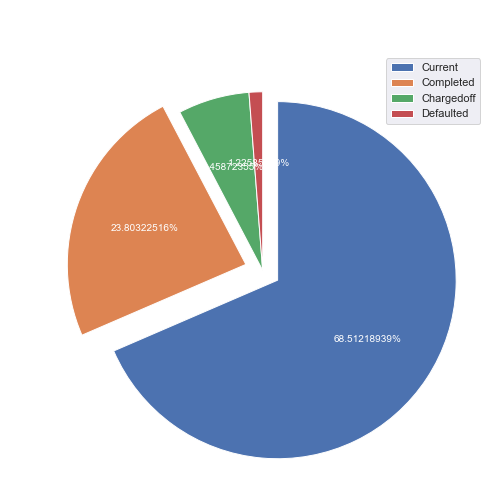

In [158]:
plt.figure(figsize=(8,8))
# topic=['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
# topic1=df2['LoanStatus'].value_counts()[:5]
labels=["Current","Completed","Chargedoff","Defaulted"]
# label1=list(topic)
df_LoanStatus=df2.LoanStatus.value_counts()[:4]
plt.axis('equal')
plt.title('Loan Status Counts')
plt.legend(loc="best")
plt.savefig('Loan Status Counts',bbox_inches='tight',pad_inches=0.0)
# separeted=(0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
separeted=(0.1,0.1,0,0)
plt.pie(df_LoanStatus,explode=separeted,labels=labels,startangle = 90, autopct= '%1.8f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('LoanStatus Ratio', y=1.05, fontsize=25, fontweight='bold', color = 'white');
plt.legend(labels)

In [159]:
## review the counts for each Loan status.
df2.LoanStatus.value_counts()

Current                   55945
Completed                 19437
Chargedoff                 5274
Defaulted                  1001
Past Due (1-15 days)        805
Past Due (31-60 days)       359
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      204
Past Due (>120 days)         16
Cancelled                     0
Name: LoanStatus, dtype: int64

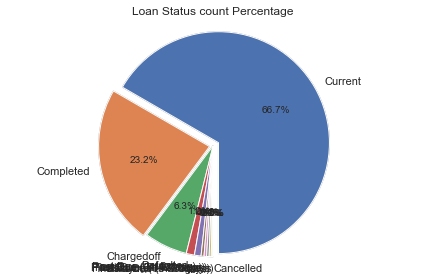

In [160]:
## plot the value_counts into pie plot, (use different way)
fig,ax=plt.subplots()
labels=['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)',
'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)'
,'Cancelled']
counts=[55945,19437,5274,1001,805,359,313,304,265,204,16,0]

### explode the slice
explode= (5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)

### add color
# colors=['#ff9999','#66b3ff']
# my_colors=['lightblue','lightsteelblue','silver'],

textprops= {'fontsize':25}

# draw circle
# centre_circle=plt.Circle((0,0),0.7,fc='white')
# fig=plt.gcf()
# fig.gca().add_artist(centre_circle)

ax.pie(counts,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=270,radius=90)
ax.axis('equal') # equal aspect ratio ensures the pie chart is circular.
ax.set_title('Loan Status count Percentage',)



# patches,texts,autotexts=axs[1,0].pie(fracs,labels=labels,autopct='%.0f%%',textprops={'size':'smaller'},shadow=True,radius=0.5)


plt.tight_layout()
plt.show()

## Listing Loan Trend

### The listing loan amount was skyrocketing from 2013, current loan status cusotmer has more than 66% percentage of total loan, means bank business skyrocketing after 2013. Time impact LoanStatus obviously since 2011,most of the loan last to current was started from 2011,it going up tremendously after 2013. During the financial crisis in 2009, there is barely any loan record. there is a peak in 2011 suddenly lot of loan were completed.

Text(0.5, 1.0, 'Listing Loan Trend counted By Loan Status')

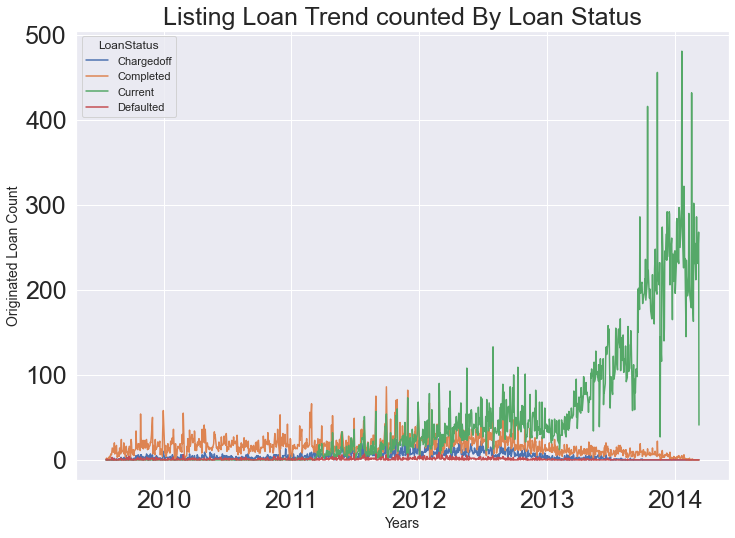

In [161]:
df_Date1.plot.line(figsize=(11.69,8.27),title='LoanStatus Treding Chart',fontsize=25)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Originated Loan Count',fontsize=14)
plt.title('Listing Loan Trend counted By Loan Status',fontsize=25)

In [ ]:
### The most current loan was skyrocketing from 2013, current loan status cusotmer has more than 66% percentage of total loan, means bank business skyrocketing after 2013.
### time impact LoanStatus obviously since 2011,most of the loan last to current was started from 2011,it going up tremendously after 2013.
### during the financial crisis in 2009, there is barely any loan record. there is a peak in 2011 suddenly lot of loan were completed.

In [456]:
df_Date2=df2.groupby('LoanDate')['Good Loan'].value_counts().unstack().fillna(0)

## Good Loan/Bad Loan historical trend 

### it show there was a dip of good loan in 2013 but skyrocketing after then. bad loan not changing much for all time.


Text(0.5, 1.0, 'Listing Loan Trend counted By Loan Status')

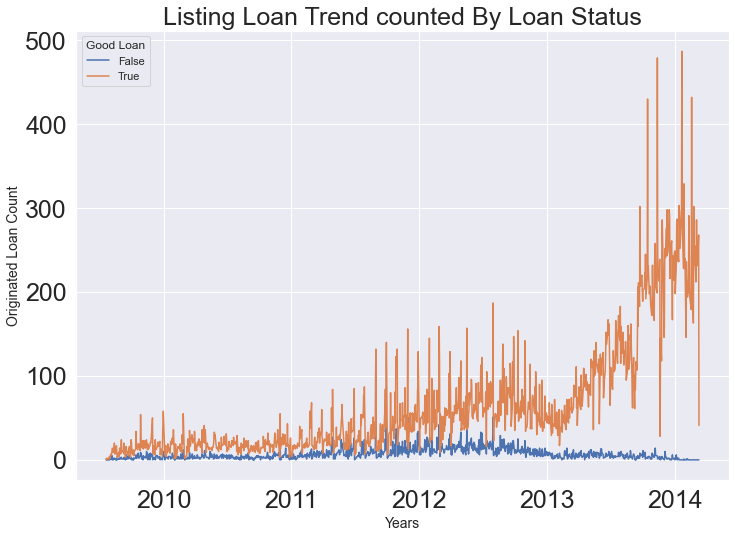

In [457]:
df_Date2.plot.line(figsize=(11.69,8.27),title='LoanStatus Treding Chart',fontsize=25)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Originated Loan Count',fontsize=14)
plt.title('Listing Loan Trend counted By Loan Status',fontsize=25)

## it show there was a dip of good loan in 2013 but skyrocketing after then. bad loan not changing much for all time. 

In [461]:
Ereturn_date=df2.groupby('LoanDate')['Earning'].value_counts().unstack().fillna(0)

## Earning Historial Trend
### But on the contrary, Poor estimate return skyrocketiing after 2013, so looks like most current loan are estimated lower return than the bad loan.

Text(0.5, 1.0, 'Listing Loan Trend counted By Estimate Earning')

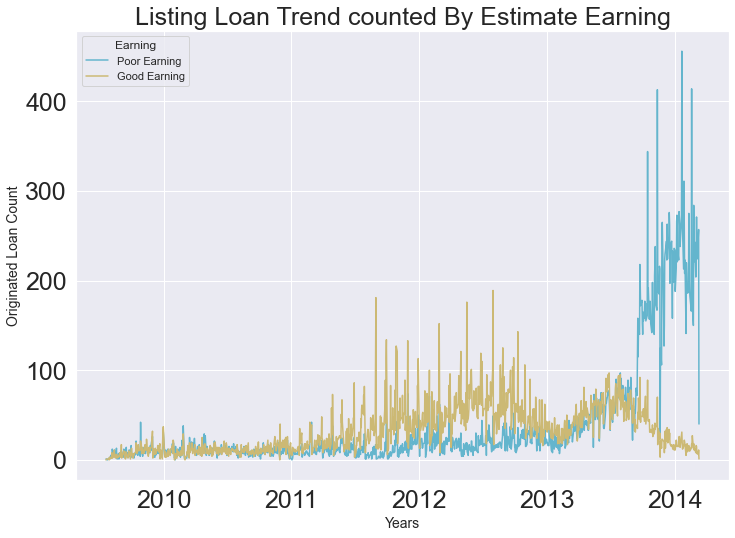

In [462]:
Ereturn_date.plot.line(figsize=(11.69,8.27),title='LoanStatus Treding Chart',fontsize=25, color=['c','y'])
plt.xlabel('Years',fontsize=14)
plt.ylabel('Originated Loan Count',fontsize=14)
plt.title('Listing Loan Trend counted By Estimate Earning',fontsize=25)

### surprisingly good loans are positively correlated with low estimate earning.

### apparently good loan are outnumber bad loan. original amount with 10k and 15k are the most common orignal amount.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Origonal Loan for Good and Bad Loan')

<Figure size 1440x1440 with 0 Axes>

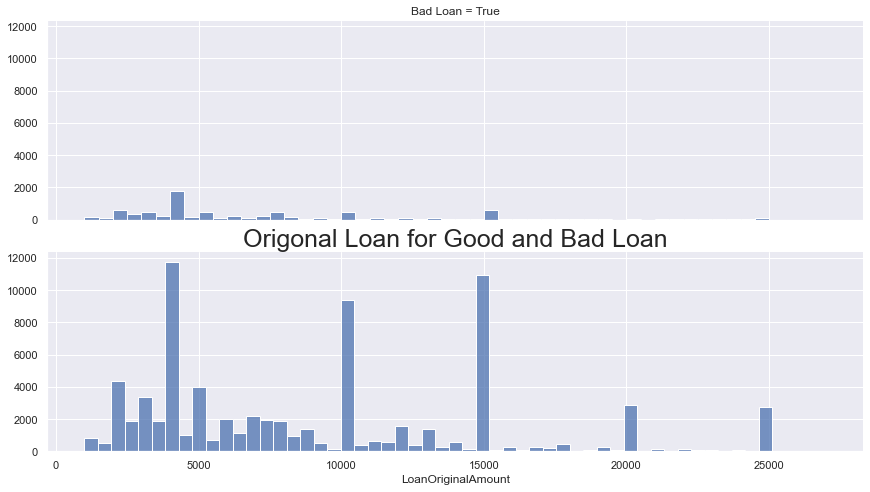

In [553]:
### find out occupation and APR relationship
df2["Bad Loan"]=df2["LoanStatus"].isin(["Past Due (31-60 days)","Past Due (61-90 days)",
                                        "Past Due (91-120 days)","Past Due (>120 days)","Defaulted","Chargedoff"
                                       ])

plt.figure(figsize=(20,20))
group_means = df2.groupby(['Bad Loan']).mean()
group_order = group_means.sort_values(['LoanOriginalAmount'], ascending = True).index

g = sb.FacetGrid(data = df2, row = 'Bad Loan', size = 3.50, aspect = 3.5,height=1.5,
                 row_order = group_order)


# g = sb.FacetGrid(data = df2, row = 'Bad Loan', size = 3.50, aspect = 4,height=1.5,
                 #row_order = group_mean)
    
    
g.map(sb.histplot, 'LoanOriginalAmount')
# g.set_titles({})

plt.title('Origonal Loan for Good and Bad Loan',fontsize=25)



#### eventhough 'good loan' has significant large number than 'bad Loan', the plot above can the original amount for good loan and bad loan

In [548]:
group_means

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_n,ProsperScore,ListingCategory (numeric),...,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Good Loan
Bad Loan,,,,,,,,,,,,,,,,,,,,,
False,792184.010619,0.221008,0.190575,0.180571,0.164913,0.077051,0.09397,4.173594,5.986616,3.265354,...,-3.262449,0.158292,17.375000,14.952006,9142.117799,292.618305,0.017168,0.007697,3.558379,0.986042
True,571985.332187,0.289285,0.256174,0.246166,0.218107,0.112437,0.12283,2.965323,5.400853,3.947846,...,-17.877520,417.706619,14.439546,27.217284,6473.888537,231.194223,0.016513,0.007293,5.499576,0.000000


In [544]:
df2.CurrentDelinquencies.value_counts()

0.0     70430
1.0      8168
2.0      2608
3.0      1033
4.0       602
5.0       309
6.0       228
7.0       166
8.0       106
9.0        76
10.0       52
11.0       41
13.0       26
12.0       23
15.0       11
14.0       11
16.0        9
17.0        8
21.0        5
24.0        2
18.0        2
27.0        2
19.0        1
22.0        1
32.0        1
20.0        1
51.0        1
Name: CurrentDelinquencies, dtype: int64

In [604]:
df2.LoanOriginationQuarter.value_counts(),df2.LoanDate

(Q4 2013    14224
 Q1 2014    11944
 Q3 2013     9054
 Q2 2013     7026
 Q3 2012     5632
 Q2 2012     5061
 Q1 2012     4435
 Q4 2012     4425
 Q4 2011     3913
 Q1 2013     3616
 Q3 2011     3093
 Q2 2011     2478
 Q1 2011     1744
 Q4 2010     1509
 Q2 2010     1479
 Q4 2009     1345
 Q3 2010     1220
 Q1 2010     1191
 Q3 2009      534
 Name: LoanOriginationQuarter, dtype: int64,
 1         2014-03-03
 3         2012-11-01
 4         2013-09-20
 5         2013-12-24
 6         2013-04-18
              ...    
 113932    2013-04-22
 113933    2011-11-07
 113934    2013-12-23
 113935    2011-11-21
 113936    2014-01-21
 Name: LoanDate, Length: 83923, dtype: object)

In [ ]:
## Loan Originated Trend, visualized by quarter.

###  originaed loan total increased dramatically after q2 of 2013. bad loan ratio are decreased.

Text(0.5, 1.0, 'The count of originated(bad/good) loans in different quarters')

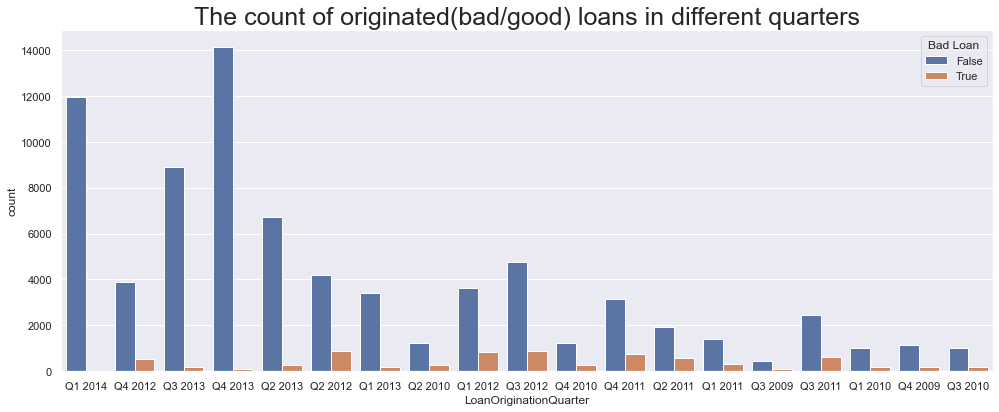

In [171]:
df2["Bad Loan"]=df2["LoanStatus"].isin(["Past Due (31-60 days)","Past Due (61-90 days)",
                                        "Past Due (91-120 days)","Past Due (>120 days)","Defaulted","Chargedoff"])
plt.figure(figsize=(16.69, 6.27))

sb.countplot(x='LoanOriginationQuarter',data=df2,hue='Bad Loan')
plt.title('The count of originated(bad/good) loans in different quarters',fontsize=25)


In [172]:
### calculate the average estimated return for each quarter

In [173]:
## df2.loc[df2['BorrowerState'].isin
 ##          (['CA','TX','FL','NY','IL']) & df2['IncomeRange'].isin(['$0'])].groupby('BorrowerState')['BorrowerAPR'].mean()

df2.groupby('LoanOriginationQuarter')['EstimatedReturn'].mean().sort_values()

LoanOriginationQuarter
Q1 2014    0.072890
Q4 2013    0.081640
Q3 2013    0.091932
Q2 2013    0.094978
Q1 2013    0.095722
Q3 2009    0.097396
Q1 2010    0.098801
Q4 2012    0.102332
Q2 2010    0.102606
Q1 2011    0.106343
Q1 2012    0.106394
Q3 2010    0.107550
Q4 2009    0.109184
Q2 2011    0.113070
Q3 2012    0.113566
Q4 2010    0.115118
Q2 2012    0.115509
Q4 2011    0.116053
Q3 2011    0.121726
Name: EstimatedReturn, dtype: float64

In [174]:
qu1=df2.loc[df2['LoanOriginationQuarter'].str.contains('Q1')].groupby('LoanOriginationQuarter')['EstimatedReturn'].mean().sort_values()
qu2=df2.loc[df2['LoanOriginationQuarter'].str.contains('Q2')].groupby('LoanOriginationQuarter')['EstimatedReturn'].mean().sort_values()
qu3=df2.loc[df2['LoanOriginationQuarter'].str.contains('Q3')].groupby('LoanOriginationQuarter')['EstimatedReturn'].mean().sort_values()
qu4=df2.loc[df2['LoanOriginationQuarter'].str.contains('Q4')].groupby('LoanOriginationQuarter')['EstimatedReturn'].mean().sort_values()


In [175]:
qu1,qu2,qu3,qu4

(LoanOriginationQuarter
 Q1 2014    0.072890
 Q1 2013    0.095722
 Q1 2010    0.098801
 Q1 2011    0.106343
 Q1 2012    0.106394
 Name: EstimatedReturn, dtype: float64,
 LoanOriginationQuarter
 Q2 2013    0.094978
 Q2 2010    0.102606
 Q2 2011    0.113070
 Q2 2012    0.115509
 Name: EstimatedReturn, dtype: float64,
 LoanOriginationQuarter
 Q3 2013    0.091932
 Q3 2009    0.097396
 Q3 2010    0.107550
 Q3 2012    0.113566
 Q3 2011    0.121726
 Name: EstimatedReturn, dtype: float64,
 LoanOriginationQuarter
 Q4 2013    0.081640
 Q4 2012    0.102332
 Q4 2009    0.109184
 Q4 2010    0.115118
 Q4 2011    0.116053
 Name: EstimatedReturn, dtype: float64)

In [176]:
### general speaking, q2 has the best estimate Return
qu1.mean(),qu2.mean(),qu3.mean(),qu4.mean()

(0.09602983574417241,
 0.10654081477298709,
 0.10643428818065943,
 0.10486556138484375)

In [178]:
df2.loc[df2['LoanOriginationQuarter'].str.contains('Q2')].LoanOriginationQuarter.value_counts()

Q2 2013    7026
Q2 2012    5061
Q2 2011    2478
Q2 2010    1479
Name: LoanOriginationQuarter, dtype: int64

In [179]:

df2.loc[df2['LoanOriginationQuarter'].str.contains('Q2|Q3')].LoanOriginationQuarter.value_counts()

Q3 2013    9054
Q2 2013    7026
Q3 2012    5632
Q2 2012    5061
Q3 2011    3093
Q2 2011    2478
Q2 2010    1479
Q3 2010    1220
Q3 2009     534
Name: LoanOriginationQuarter, dtype: int64

### Q2 and Q3 have the most originated total count and also have the higest average Estimate return

Text(0.5, 1.0, 'The count of originated loans (bad/good) in 2rd and 3rd quarter')

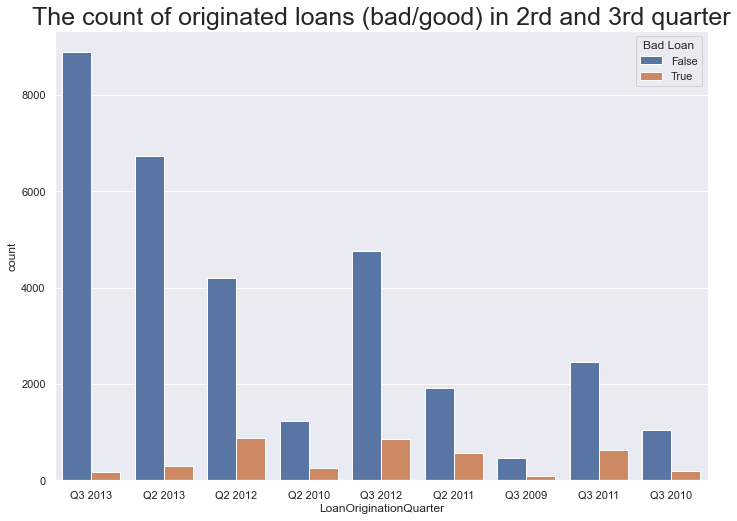

In [180]:
# df2["Bad Loan"]=df2["LoanStatus"].isin(["Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (>120 days)","Defaulted","Chargedoff"])
#plt.figure(figsize=(16,7))
plt.figure(figsize=(11.69, 8.27))
sb.countplot(x='LoanOriginationQuarter',data=df2.loc[df2['LoanOriginationQuarter'].str.contains('Q2|Q3')],hue='Bad Loan')
plt.title('The count of originated loans (bad/good) in 2rd and 3rd quarter',fontsize=25)

### Query the count for  only in Q2 and Q3 for each years, because the q2 and q3 has the strongest origination Number

In [181]:
group_order

Index([True, False], dtype='object', name='Bad Loan')

In [182]:
group_means.EstimatedLoss

Bad Loan
False    0.077051
True     0.112437
Name: EstimatedLoss, dtype: float64

In [183]:
group_means_selected=group_means[["BorrowerAPR",                        
"BorrowerRate",                     
"LenderYield",                          
"EstimatedEffectiveYield",       
"EstimatedLoss",                        
"EstimatedReturn",                      
"ProsperRating_n",                      
"ProsperScore",                        
"EmploymentStatusDuration",             
"IsBorrowerHomeowner",                  
"CreditScoreRangeLower",                
"CreditScoreRangeUpper",                
"CurrentCreditLines",                   
"OpenCreditLines",                      
"CurrentDelinquencies",                
"AmountDelinquent",                     
"DelinquenciesLast7Years",              
"DebtToIncomeRatio",                   
"StatedMonthlyIncome",               
"LoanOriginalAmount",                   
"MonthlyLoanPayment"                   
]]

### here we can see the mean different between good/bad loan in all columns.

In [184]:

group_means_selected

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_n,ProsperScore,EmploymentStatusDuration,IsBorrowerHomeowner,...,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
Bad Loan,,,,,,,,,,,,,,,,,,,,,
False,0.221008,0.190575,0.180571,0.164913,0.077051,0.09397,4.173594,5.986616,104.151803,0.531465,...,719.149238,10.629422,9.654691,0.303042,926.768407,3.654704,0.255381,5994.336266,9142.117799,292.618305
True,0.289285,0.256174,0.246166,0.218107,0.112437,0.12283,2.965323,5.400853,91.067997,0.467868,...,707.154672,9.000963,7.993532,0.528279,1259.200358,3.951562,0.300175,4627.658192,6473.888537,231.194223


In [185]:
group_means_selected.BorrowerAPR

Bad Loan
False    0.221008
True     0.289285
Name: BorrowerAPR, dtype: float64

### the average INDEX Between Bad Loan and not Bad Loan

### Good Loan or not bad loan has lower APR and Lower estimate loss by average. but bad loan actually has higher estimate return than good loan by average.

Text(0.5, 1.0, 'APR Average between two type of loan')

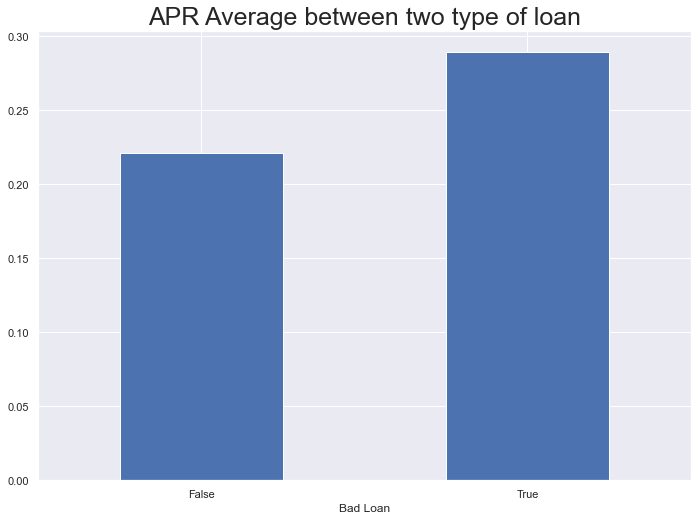

In [186]:
## The Average APR between Bad Loan and not Bad Loan
plt.figure(figsize=(11.69, 8.27))
axes = group_means_selected.BorrowerAPR.plot.bar(rot=0, subplots=True)

plt.title('APR Average between two type of loan',fontsize=25)

#axes[1].legend(loc=2)

In [187]:
lostmean=df2.groupby('Bad Loan')['EstimatedLoss'].mean()

In [188]:
earnmean=df2.groupby('Good Loan')['EstimatedReturn'].mean()

Text(0.5, 1.0, 'Estimated Loss Average between two type of loan')

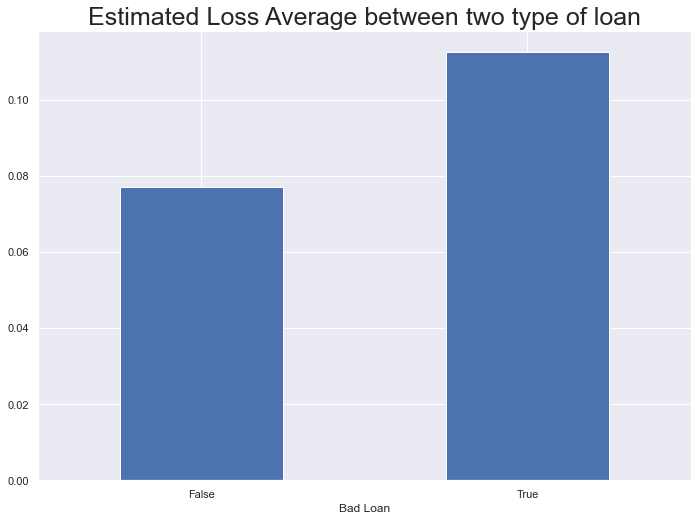

In [189]:
### the Estimated Average Lost for bad loan and not bad loan
plt.figure(figsize=(11.69, 8.27))
axes = lostmean.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2) 
plt.title('Estimated Loss Average between two type of loan',fontsize=25)

Text(0.5, 1.0, 'Eestimated Earn Average between two type of loan')

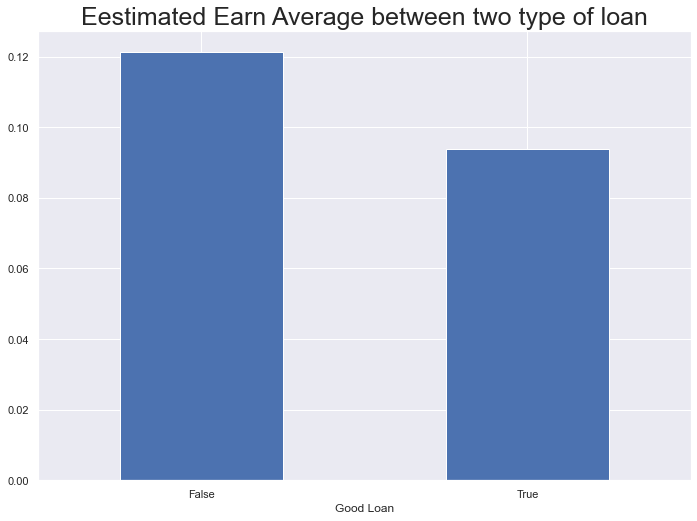

In [190]:
plt.figure(figsize=(11.69, 8.27))
axes = earnmean.plot.bar(rot=0, subplots=True)
plt.title('Eestimated Earn Average between two type of loan',fontsize=25)

### The average Estimate Return between good Loan and not good loan

plt.figure(figsize=(11.69, 8.27))
axes = earnmean.plot.bar(rot=0, subplots=True)

In [191]:
## axes = group_means.EstimatedLoss.plot.bar(rot=0, subplots=True)

## Multivariate Exploration

### As i mentioned above, I hope this report can be used as a reference for periodic business summary, to review business situation from a macro or micro perspective, and find out the factors that affect the business (where, who, when, what), so the management can adjust the in time.
### so here i tried to find out 'when','where','what' affect the estimate return or loan status.

In [466]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83923 entries, 1 to 113936
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ListingKey                           83923 non-null  object  
 1   ListingNumber                        83923 non-null  int64   
 2   CreditGrade                          0 non-null      object  
 3   Term                                 83923 non-null  category
 4   LoanStatus                           83923 non-null  category
 5   ClosedDate                           25712 non-null  object  
 6   BorrowerAPR                          83923 non-null  float64 
 7   BorrowerRate                         83923 non-null  float64 
 8   LenderYield                          83923 non-null  float64 
 9   EstimatedEffectiveYield              83923 non-null  float64 
 10  EstimatedLoss                        83923 non-null  float64 
 11  EstimatedRetur

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

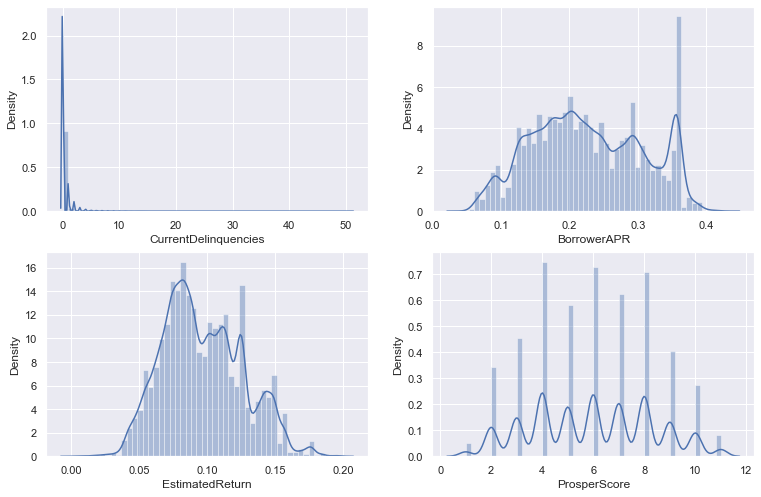

In [607]:
# plt.figure(figsize=(9.69, 8.27))
def plot_multiple_histograms(df2, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12.69, 8.27))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df2[col], kde=True, ax=axs)
            else:
                sns.distplot(df2[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df2[col], kde=True, ax=axs[i, j])

         
plot_multiple_histograms(df2, ['CurrentDelinquencies','BorrowerAPR','EstimatedReturn','ProsperScore'])

## Multiple histograms giving us the pictures of data distrution for different importance features.

## Loan Status VS Estimate Return Trend

### Try to answer the question 'when' plot in a mutivariate plot, try to see what is the trend(time)of estimate return between Bad Loan or not Bad Loan. Good Loan overwhelmingly overnumber Bad Loan from 2012. 


/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


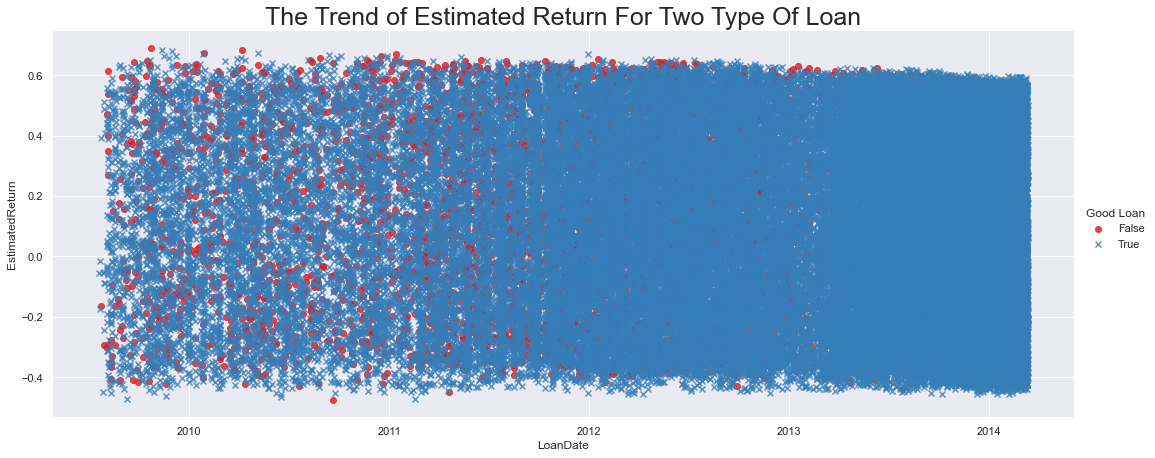

In [611]:
# plt.figure(figsize=(16,14))
sns.set_theme(color_codes=True)
sns.lmplot(y="EstimatedReturn",x="LoanDate",markers=['o','x'],hue='Good Loan',fit_reg=False,size=6,data=df2,palette="Set1",aspect =2.5,y_jitter=.5);

plt.title('The Trend of Estimated Return For Two Type Of Loan',fontsize=25)

plt.show()

### Since the mid term of 2011, the red dot'not good loan' are cover by the good loan. Good loan are outnumber bad loan since then. 

In [469]:
df2.BorrowerState.value_counts()[:10]

CA    10609
NY     5780
TX     5557
FL     5360
IL     4212
OH     3337
GA     3303
VA     2742
NJ     2680
PA     2657
Name: BorrowerState, dtype: int64

### California has a very large number of loans compared with other states.

No handles with labels found to put in legend.


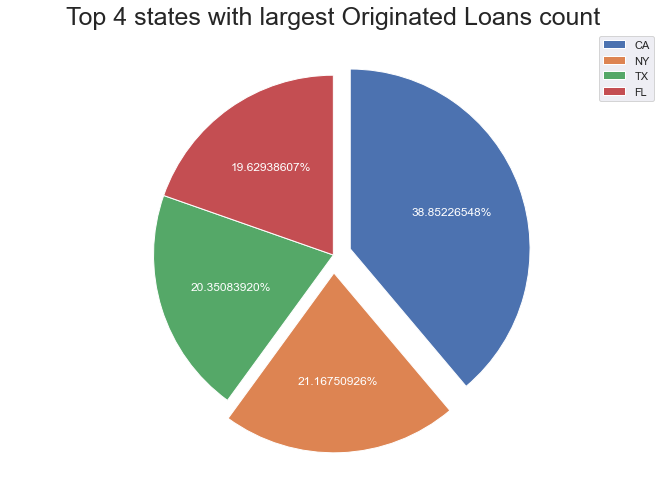

In [470]:
plt.figure(figsize=(11.69, 8.27))
# topic=['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
# topic1=df2['LoanStatus'].value_counts()[:5]
labels=["CA","NY","TX","FL"]
# label1=list(topic)
#df_LoanStatus=df2.LoanStatus.value_counts()[:4]
plt.axis('equal')
plt.title('Loan Distrubute by State')
plt.legend(loc="best")
plt.savefig('Loan Status Counts',bbox_inches='tight',pad_inches=0.0)
# separeted=(0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
#separeted=(0.1,0.0,0,0)
plt.pie(df2.BorrowerState.value_counts()[:4],explode=separeted,labels=labels,startangle = 90, autopct= '%1.8f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
# plt.title('LoanStatus Ratio', y=1.05, fontsize=25, fontweight='bold', color = 'white');

plt.title('Top 4 states with largest Originated Loans count',fontsize=25)

plt.legend(labels)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'The Trend of Estimated Return For Two Type Of Loan In California')

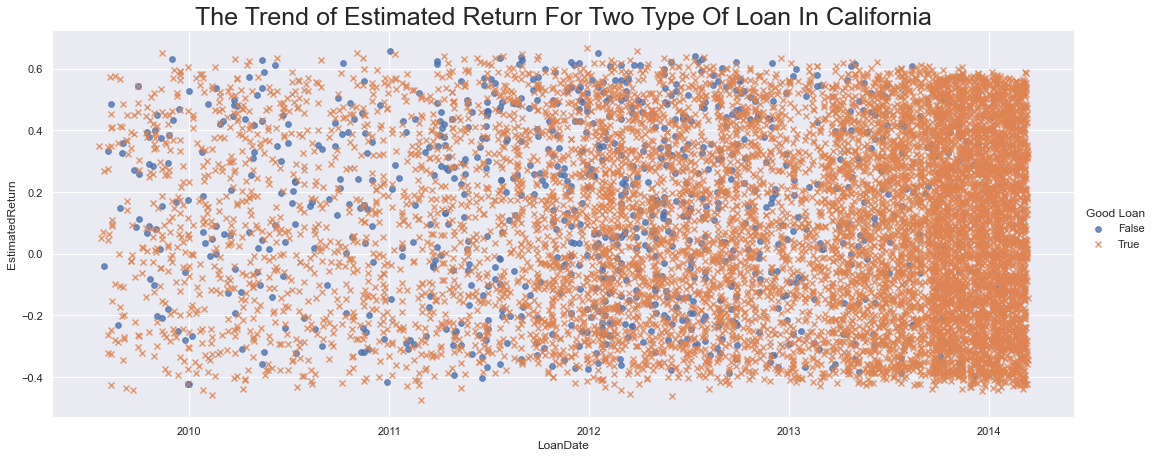

In [609]:
# plt.figure(figsize=(25,6))

sns.set_theme(color_codes=True)
g=sns.lmplot(y='EstimatedReturn',x='LoanDate',markers=['8','x'],hue='Good Loan',data=df2.loc[df2['BorrowerState'].isin
           (['CA'])],fit_reg=False,size=6,aspect =2.5,y_jitter=.5)

plt.title('The Trend of Estimated Return For Two Type Of Loan In California',fontsize=25)

### Plot in the californbia estimate return trend for bad/not bad loan, because california has the largest laon compare to the other states. Good loan out number bad loan after mid term of 2013

### Here looking for the answer 'where', does location correlate with the loan ?

In [472]:
df2.BorrowerState.value_counts()[:5]

CA    10609
NY     5780
TX     5557
FL     5360
IL     4212
Name: BorrowerState, dtype: int64

Text(0.5, 1.0, 'APR CORRELATION WITH INCOME AND STATES')

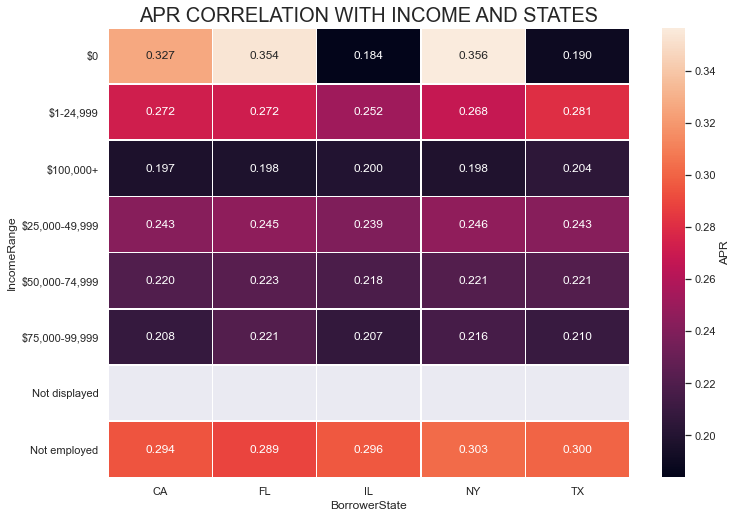

In [652]:
plt.figure(figsize=(11.69, 8.27))
data=df2.loc[df2['BorrowerState'].isin
           (['CA','TX','NY','FL','IL'])]
cat_means = data.groupby(['BorrowerState', 'IncomeRange']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR')
cat_means = cat_means.pivot(index = 'IncomeRange', columns = 'BorrowerState',
                            values = 'BorrowerAPR')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'APR'},linewidths=.6)

plt.title('APR CORRELATION WITH INCOME AND STATES',fontsize=20)

### same heat plot, shorten income range to 4 catergory, viewing the plot in different angle.

In [474]:
## catergorized APR into 4 different layers

bin_edges=[0,3.200333e+03,4.666667e+03,6.825000e+03,1.750003e+06]
bin_names=['LowIncome','MedianIncome','HighIncome','VeryHighIncome']


df2['Income_Range']=pd.cut(df2['StatedMonthlyIncome'],bin_edges,labels=bin_names)
df2.Income_Range.value_counts()

VeryHighIncome    22972
HighIncome        22079
MedianIncome      21527
LowIncome         16660
Name: Income_Range, dtype: int64

Text(0.5, 1.0, 'APR CORRELATION WITH INCOME AND TOP 5 STATES')

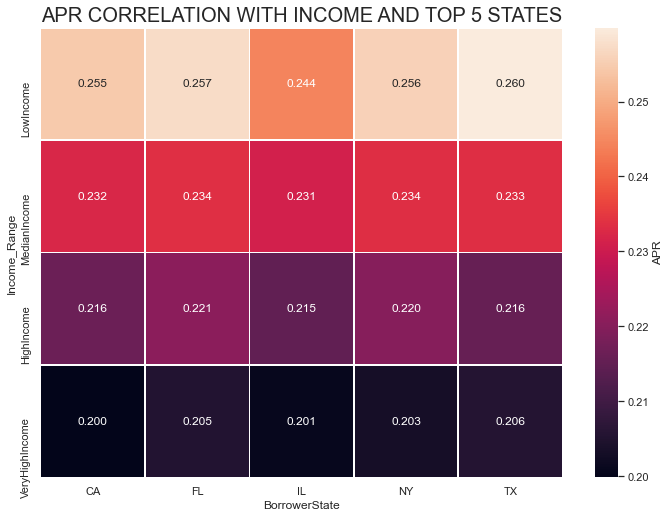

In [653]:
plt.figure(figsize=(11.69, 8.27))
data=df2.loc[df2['BorrowerState'].isin
           (['CA','TX','NY','FL','IL'])]
cat_means = data.groupby(['BorrowerState', 'Income_Range']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR')
cat_means = cat_means.pivot(index = 'Income_Range', columns = 'BorrowerState',
                            values = 'BorrowerAPR')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'APR'},linewidths=.6)

plt.title('APR CORRELATION WITH INCOME AND TOP 5 STATES',fontsize=20)

In [476]:
df2.loc[df2['BorrowerState'].isin
           (['TX'])].groupby('BorrowerState')['BorrowerAPR'].value_counts().unstack().fillna(0)

BorrowerAPR,0.05927,0.06337,0.06377,0.06587,0.06589,0.06716,0.06726,0.06828,0.06888,0.06998,...,0.38486,0.38569,0.38723,0.38845,0.38896,0.39153,0.39275,0.40315,0.40679,0.41355
BorrowerState,,,,,,,,,,,,,,,,,,,,,
TX,1,1,1,4,4,1,16,8,7,2,...,2,1,5,1,1,7,1,1,1,2


### This is a verification for the heatplot data, The average APR in Major business involved state who's income stated was "0"IL and TX customer enjoy very low if their state income is 0

In [477]:

df2.loc[df2['BorrowerState'].isin
           (['CA','TX','FL','NY','IL']) & df2['IncomeRange'].isin(['$0'])].groupby('BorrowerState')['BorrowerAPR'].mean()

BorrowerState
CA    0.326535
FL    0.353560
IL    0.183842
NY    0.356430
TX    0.189860
Name: BorrowerAPR, dtype: float64

### Very Suprise(According to the chart) that IF YOUR STATE INCOME IS NONE IN IL or TX, YOU ACTUALLY CAN GET A VERY LOW APR, in california,there is a totally different story. But need a fact check like whether the data has outlier

In [478]:
### fact check
zero=df2.loc[df2['BorrowerState'].isin(['TX','IL']) & df2['IncomeRange'].isin(['$0'])]

### There are only 5 countd for 0 income, 0 income at TX and IL are outlier, the heatplot is misleading

In [479]:

zero.IncomeRange.value_counts()

$0                5
Not employed      0
Not displayed     0
$75,000-99,999    0
$50,000-74,999    0
$25,000-49,999    0
$100,000+         0
$1-24,999         0
Name: IncomeRange, dtype: int64

In [480]:

zero.BorrowerState.value_counts()

IL    4
TX    1
Name: BorrowerState, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'FACT CHECK FOR OUTLIER')

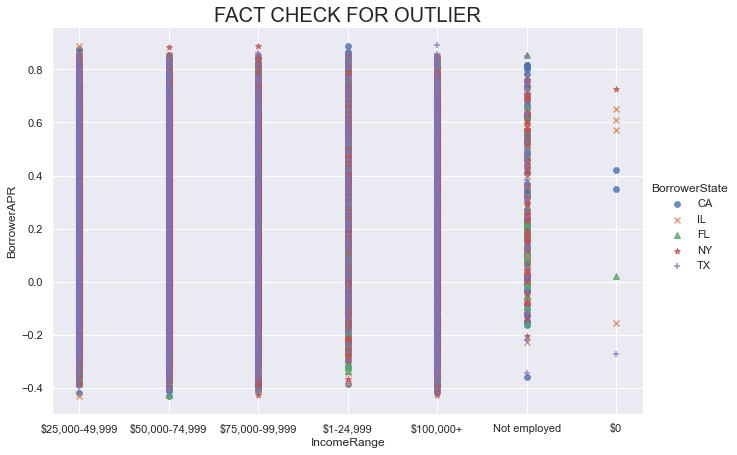

In [654]:
## zero balance is outlier 
sns.set_theme(color_codes=True)
g=sns.lmplot(y='BorrowerAPR',x='IncomeRange',markers=['8','x','^','*','+'],hue='BorrowerState',data=df2.loc[df2['BorrowerState'].isin
           (['TX','IL','CA','FL','NY'])],fit_reg=False,size=6,aspect =1.5,y_jitter=.5)

plt.title('FACT CHECK FOR OUTLIER',fontsize=20)

### zero balance is outlier 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'FACT CHECK FOR OUTLIER')

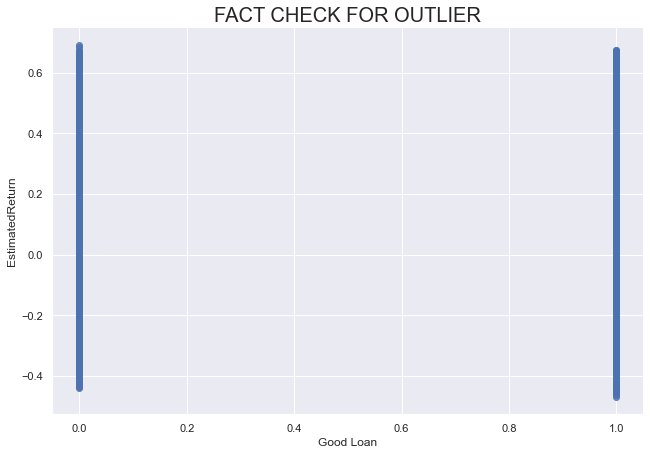

In [655]:
### Good/Bad loan are distrubuted, no outlier
sns.set_theme(color_codes=True)
g=sns.lmplot(y='EstimatedReturn',x='Good Loan',data=df2,fit_reg=False,size=6,aspect =1.5,y_jitter=.5)

plt.title('FACT CHECK FOR OUTLIER',fontsize=20)

### Good/Bad loan are distrubuted, no outlier

In [483]:
## removeing the outlier

NoneZero=df2[-df2["IncomeRange"].isin(["$0","Not employed"])]

# 1. df[-df["column"].isin(["value"])]
# 2. df[~df["column"].isin(["value"])]
# 3. df[df["column"].isin(["value"]) == False]
# 4. df[np.logical_not(df["column"].isin(["value"]))]

In [484]:
NoneZero.IncomeRange.value_counts()

$50,000-74,999    25544
$25,000-49,999    24086
$100,000+         14515
$75,000-99,999    14462
$1-24,999          4630
Not employed          0
Not displayed         0
$0                    0
Name: IncomeRange, dtype: int64

## Correlation of Different States ,Income and APR

### Income is positive correlate with the APR. The higher Income and lower APR no matter which states you living. CA has the lower average APR if income is high enough. TX has the higest APR if catagorized as lowincome.

### need to be carefully when plotting data, make sure data is clean, make sure data being process adequately and accurately.
### seems no different after the outlier have been removed for plot 1 / categorized income range into 4 level

Text(0.5, 1.0, 'APR CORRELATION WITH INCOME AND TOP 5 STATES')

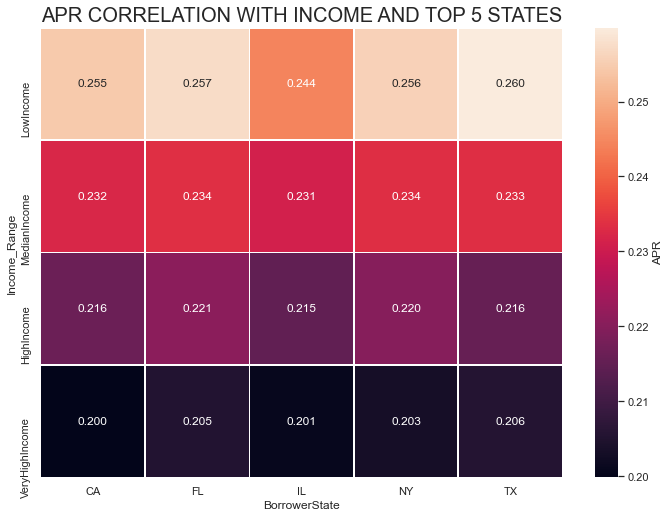

In [663]:
plt.figure(figsize=(11.69, 8.27))
data1=NoneZero.loc[NoneZero['BorrowerState'].isin
           (['CA','TX','NY','FL','IL'])]
cat_means1 = data1.groupby(['BorrowerState', 'Income_Range']).mean()['BorrowerAPR']
cat_means1 = cat_means1.reset_index(name = 'BorrowerAPR')
cat_means1 = cat_means1.pivot(index = 'Income_Range', columns = 'BorrowerState',
                            values = 'BorrowerAPR')
sb.heatmap(cat_means1, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'APR'},linewidths=.6)

plt.title('APR CORRELATION WITH INCOME AND TOP 5 STATES',fontsize=20)

### the rows '0' , 'not displayed' and 'not emploted' are outlier data. The APR is correlate with income, APR going lower by follwering higher Income Range，same on the contrast. 

Text(0.5, 1.0, 'APR CORRELATION WITH INCOME AND STATES')

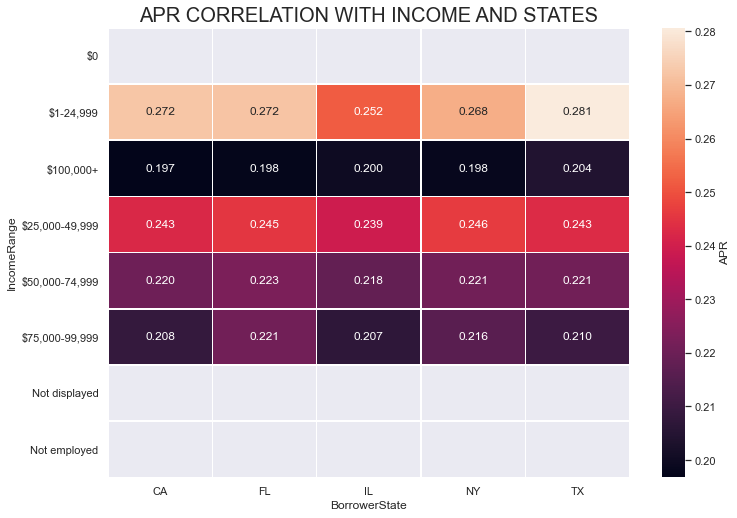

In [662]:
plt.figure(figsize=(11.69, 8.27))
data2=NoneZero.loc[(NoneZero['BorrowerState'].isin(['CA','TX','NY','FL','IL'])) & 
                   (-NoneZero['IncomeRange'].isin(['$0','Not employed',"Not displayed"]))]
                   
cat_means2 = data2.groupby(['BorrowerState', 'IncomeRange']).mean()['BorrowerAPR']
cat_means2 = cat_means2.reset_index(name = 'BorrowerAPR')
cat_means2 = cat_means2.pivot(index = 'IncomeRange', columns = 'BorrowerState',
                            values = 'BorrowerAPR')
sb.heatmap(cat_means2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'APR'},linewidths=.6)

plt.title('APR CORRELATION WITH INCOME AND STATES',fontsize=20)

## Correlation of Different States ,Income and APR

### Income is positive correlate with the APR. The higher Income and lower APR no matter which states you living. CA has the lower average APR if income is high enough. TX has the higest APR if catagorized as lowincome.

Text(0.5, 1.0, 'Estimated Return Correlation with Different States & Income')

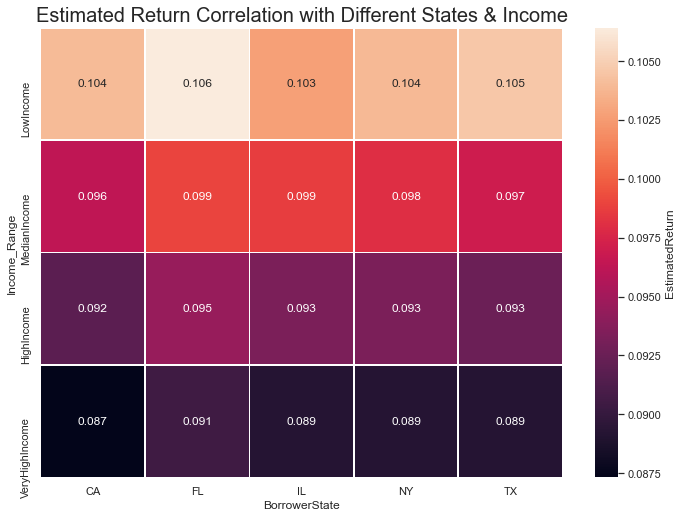

In [661]:
plt.figure(figsize=(11.69, 8.27))
data1=NoneZero.loc[NoneZero['BorrowerState'].isin
           (['CA','TX','NY','FL','IL'])]
cat_means1 = data1.groupby(['BorrowerState', 'Income_Range']).mean()['EstimatedReturn']
cat_means1 = cat_means1.reset_index(name = 'EstimatedReturn')
cat_means1 = cat_means1.pivot(index = 'Income_Range', columns = 'BorrowerState',
                            values = 'EstimatedReturn')
sb.heatmap(cat_means1, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'EstimatedReturn'},linewidths=.6)

plt.title('Estimated Return Correlation with Different States & Income',fontsize=20)

## Loan Status VS Estimate Return in top 5 states

### Apprently Good Loan status has lower estimate return than Not/good loan

Text(0.5, 1.0, 'Estimated Return Correlation with Different States & Loan Status')

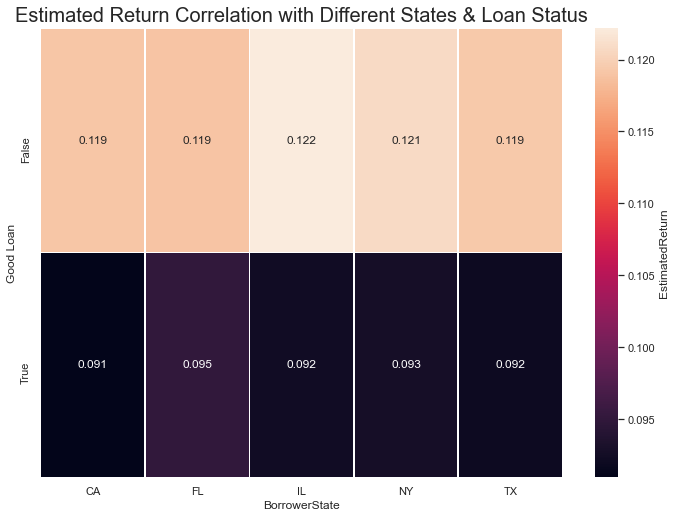

In [660]:
plt.figure(figsize=(11.69, 8.27))
data1=NoneZero.loc[NoneZero['BorrowerState'].isin
           (['CA','TX','NY','FL','IL'])]
cat_means1 = data1.groupby(['BorrowerState', 'Good Loan']).mean()['EstimatedReturn']
cat_means1 = cat_means1.reset_index(name = 'EstimatedReturn')
cat_means1 = cat_means1.pivot(index = 'Good Loan', columns = 'BorrowerState',
                            values = 'EstimatedReturn')
sb.heatmap(cat_means1, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'EstimatedReturn'},linewidths=.6)

plt.title('Estimated Return Correlation with Different States & Loan Status',fontsize=20)

### Low income/ bad loan catogorized group are actually have better EstimatedReturn compare to High income/Good Loan group, no matter which states you currently located.

### the pairgrid try to answer 'what' feature affect the estimate return
#### PAIRGRID is a very useful and dynamic plot function which you can plot in dataset in multiple variable at the same time.
#### Pairgrid telling me 'IncomeRange' not affecting the loanestimated return, But the APR Range and Term does correlate with the Estimate Return . High APR or median APR with 60 or 36 month term has low income are the key factor affect  bank estimate income to higherIt suprise me that HighAPR and Low Income are the factor make Estimate Return higher.

## Multiple Bar Plots/ Good Loan and Bad Loan

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 697.68x595.44 with 0 Axes>

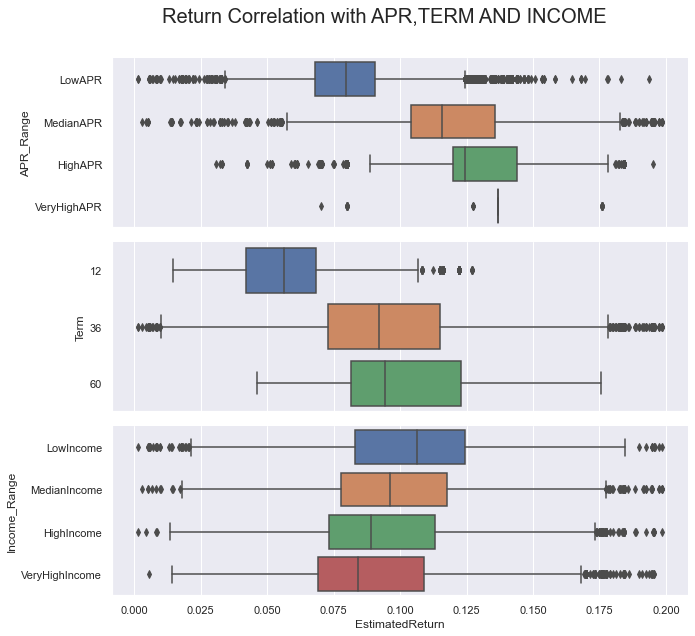

In [659]:
# plt 1, dataset include good loan and bad loan

plt.figure(figsize=(9.69, 8.27))
g = sb.PairGrid(data = df2, x_vars = ['EstimatedReturn'],
                y_vars = ['APR_Range','Term','Income_Range'],size=3,aspect=3)
#plt.title('Return Correlation with APR,TERM AND INCOME',fontsize=25)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Return Correlation with APR,TERM AND INCOME',fontsize=20)

g.map(sb.boxplot)

## Multipal Bar plot for good loan
#### We know bad loan has average higher estimate return than good loan, probably bank will charge those bad loan group customer more fee in order to cover the risk, but once loan become charge off or default loan, bank will suffer lost. so the second plot  only remains current, complete or finial payment process loans (good loan) so we can tell what other factor affect the estimate income.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 697.68x595.44 with 0 Axes>

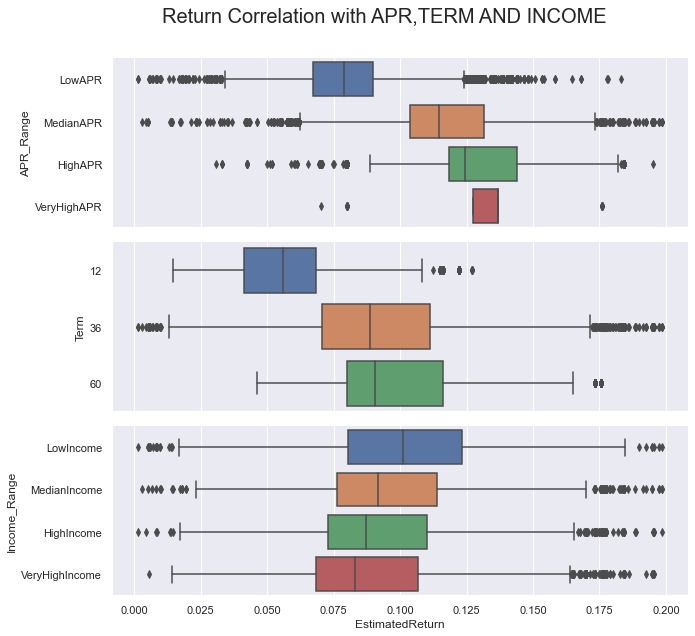

In [783]:
# plot 2 , dataset without bad loan.

plt.figure(figsize=(9.69, 8.27))
g = sb.PairGrid(data = df2.loc[df2['LoanStatus'].isin
           (['Current','Completed','FinalPaymentInProgress'])], x_vars = ['EstimatedReturn'],
                y_vars = ['APR_Range','Term','Income_Range'],size=3,aspect=3)
#plt.title('Return Correlation with APR,TERM AND INCOME',fontsize=25)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Return Correlation with APR,TERM AND INCOME',fontsize=20)

g.map(sb.boxplot)

### Low APR and term of 12 months(too short loan term) are the keey factors that affect the estimate income. Borrowers 's income are not quite correlated.

### Categorized the loans the bank try to avoid. and figure out what causing the those loan. They are:
## 'Charged Off' and 'Default'

#### A loan becomes “charged off” when there is no longer a reasonable expectation of further payments. Charge off typically occurs when a loan is 120 days or more past due. Learn more about the difference between “charge off” and “default”.
#### A Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments.  Charge Off typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off.  In certain circumstances, loans may be charged off at an earlier or later date.  Please note, loans for which borrowers have filed for bankruptcy may be charged off earlier based on the date of bankruptcy notification.

In [642]:
df2.LoanStatus.value_counts()

Current                   55945
Completed                 19437
Chargedoff                 5274
Defaulted                  1001
Past Due (1-15 days)        805
Past Due (31-60 days)       359
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      204
Past Due (>120 days)         16
Cancelled                     0
Name: LoanStatus, dtype: int64

In [630]:
## defind those loas as declines_loan

df2["Declines_Loan"]=df2["LoanStatus"].isin(['Chargedoff','Defaulted','Past Due (>120 days)','Past Due (91-120 days)'])


### plot in data into pointplot, seeing the correlation between originalmaount, APR range in different income level

In [488]:
## catergorized APR into 4 different layers

bin_edges=[0.07,0.25,0.35,0.4,0.6]
bin_names=['LowAPR','MedianAPR','HighAPR','VeryHighAPR']


df2['APR_Range']=pd.cut(df2['BorrowerAPR'],bin_edges,labels=bin_names)


## Charge off/Defalut loan APR

### Very highAPR APR Group has around 26% chance fallin declines loan, compare to HighAPR 24%, MdianAPR 12% and lowapr 3%. So higher the APR, higher chance Declins Loan

Text(0.5, 1.0, 'APR counts for Declines/non declines Loan')

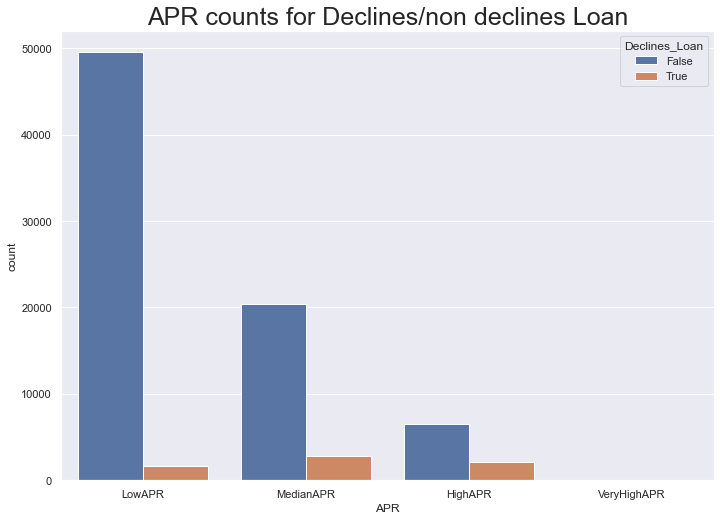

In [648]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(data=df2, x='APR_Range', hue='Declines_Loan');
plt.xlabel('APR');
plt.ylabel('count');
plt.title('APR counts for Declines/non declines Loan',fontsize=25)

#### calculate the precentage of declins loan in each APR group

In [712]:
# df2.query('APR_Range=="LowAPR"')
# df2.loc[(df2['APR_Range'] == 'LowAPR') & (df2['Declines_Loan'] ==True)].Declines_Loan.shape[:1]/
LowAPR_Index=df2.query('APR_Range=="LowAPR"')
MedianAPR_Index=df2.query('APR_Range=="MedianAPR"')
HighAPR_Index=df2.query('APR_Range=="HighAPR"')
VeAPR_Index=df2.query('APR_Range=="VeryHighAPR"')


In [713]:
LowAPR_T=df2.loc[(df2['APR_Range'] == 'LowAPR') & (df2['Declines_Loan'] ==True)]
MeAPR_T=df2.loc[(df2['APR_Range'] == 'MedianAPR') & (df2['Declines_Loan'] ==True)]
HiAPR_T=df2.loc[(df2['APR_Range'] == 'HighAPR') & (df2['Declines_Loan'] ==True)]
VeAPR_T=df2.loc[(df2['APR_Range'] == 'VeryHighAPR') & (df2['Declines_Loan'] ==True)]

In [714]:
[len(LowAPR_T)/len(LowAPR_Index),
len(MeAPR_T)/len(MedianAPR_Index),
len(HiAPR_T)/len(HighAPR_Index),
len(VeAPR_T)/len(VeAPR_Index)]


[0.03313558660526111,
 0.12088716623600344,
 0.24013005109150024,
 0.26153846153846155]

#### Very highAPR APR Group has around 26% chance fallin declines loan, compare to HighAPR 24%,  MdianAPR 12% and lowapr 3%. So higher the APR, higher chance Declins Loan

## Charge off/defalut loan vs Income Range

### 'Income' correlate with the 'precentage of become declines loan', the higher income, the lower chance become declins loan. if customer's income larger than100k, there is less than 5% chance become declines loan , but those not employed cusotmer, declins loan chance is 5 times than the 100k above customers.

Text(0.5, 1.0, 'Income Range counts for Declines/non declines Loan')

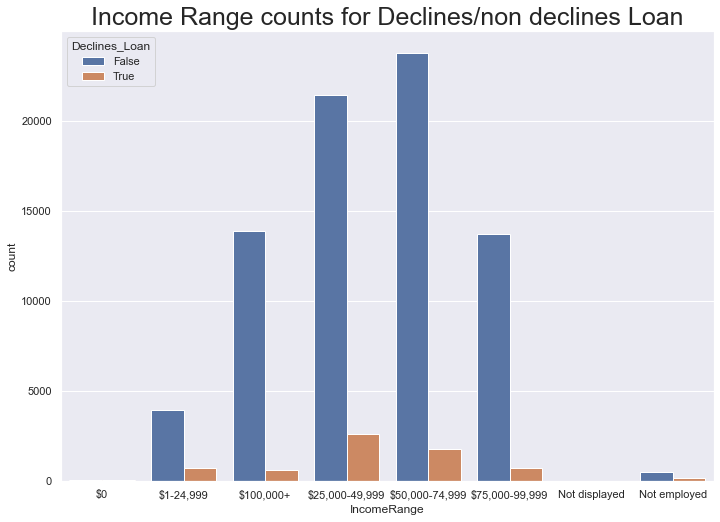

In [646]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(data=df2, x='IncomeRange', hue='Declines_Loan');
plt.xlabel('IncomeRange');
plt.ylabel('count');
plt.title('Income Range counts for Declines/non declines Loan',fontsize=25)

#### calculate the precentage of declins loan in each income range

In [752]:
df2.IncomeRange.value_counts()

$50,000-74,999    25544
$25,000-49,999    24086
$100,000+         14515
$75,000-99,999    14462
$1-24,999          4630
Not employed        642
$0                   44
Not displayed         0
Name: IncomeRange, dtype: int64

In [758]:
LowIncome_Index=df2.query('IncomeRange=="$1-24,999"')
MedianIncome_Index=df2.query('IncomeRange=="$25,000-49,999"')
MedianPlueIncome_Index=df2.query('IncomeRange=="$50,000-74,999"')
HighIncome_Index=df2.query('IncomeRange=="$75,000-99,999"')
TenK_Index=df2.query('IncomeRange=="$100,000+"')
NotEmp_Index=df2.query('IncomeRange=="Not employed"')


LowIncome_T=df2.loc[(df2['IncomeRange'] == '$1-24,999') & (df2['Declines_Loan'] ==True)]
MedianIncome_T=df2.loc[(df2['IncomeRange'] == '$25,000-49,999') & (df2['Declines_Loan'] ==True)]
MedianPlueIncome_T=df2.loc[(df2['IncomeRange'] == '$50,000-74,999') & (df2['Declines_Loan'] ==True)]
HiIncome_T=df2.loc[(df2['IncomeRange'] == '$75,000-99,999') & (df2['Declines_Loan'] ==True)]
TenKIncome_T=df2.loc[(df2['IncomeRange'] == '$100,000+') & (df2['Declines_Loan'] ==True)]
NotEmp_T=df2.loc[(df2['IncomeRange'] == 'Not employed') & (df2['Declines_Loan'] ==True)]

In [772]:
[len(LowIncome_T)/len(LowIncome_Index),
len(MedianIncome_T)/len(MedianIncome_Index),
len(MedianPlueIncome_T)/len(MedianPlueIncome_Index),
len(HiIncome_T)/len(HighIncome_Index),
len(TenKIncome_T)/len(TenK_Index),
len(NotEmp_T)/len(NotEmp_Index)]

[0.15658747300215983,
 0.1085277754712281,
 0.06796116504854369,
 0.05054625916194164,
 0.04216327936617292,
 0.2570093457943925]

#### 'Income' correlate with the 'precentage of become declines loan', the higher income, the lower chance become declins loan. if customer's income larger than100k, there is less than 5% chance become declines loan , but those not employed cusotmer, declins loan chance is 5 times than the 100k above customers.

Text(0.5, 1.0, 'Income/APR correlation with Declines Loan')

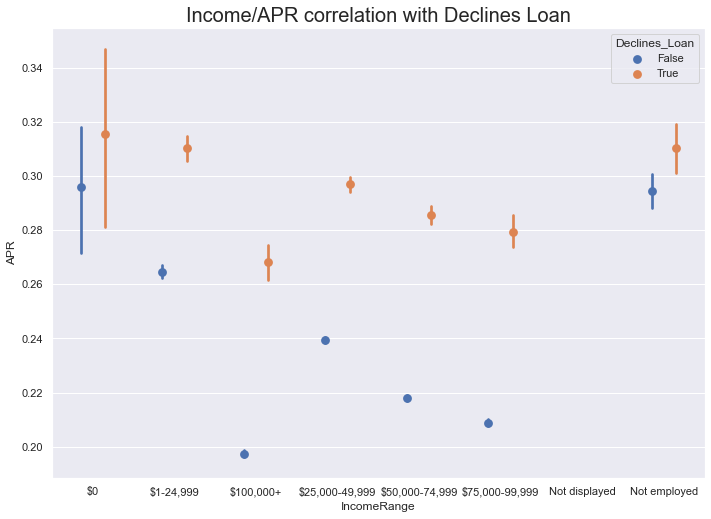

In [658]:
### pointplot 1 : x bar with orignal income range
plt.figure(figsize=(11.69, 8.27))
sb.pointplot(data=df2, y='BorrowerAPR', x='IncomeRange', hue='Declines_Loan', dodge=0.3, linestyles="");
plt.xlabel('IncomeRange');
plt.ylabel('APR');
plt.title('Income/APR correlation with Declines Loan',fontsize=20)

#### 'Declines loan' normally has higher APR than 'Non declines loan', more obvious between $1-$100k income range

In [490]:

df2.BorrowerAPR.describe()

count    83923.000000
mean         0.226920
std          0.079824
min          0.045830
25%          0.164990
50%          0.220290
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

Text(0.5, 1.0, 'Original Amount Correlation with Incom(4 Category) and APR')

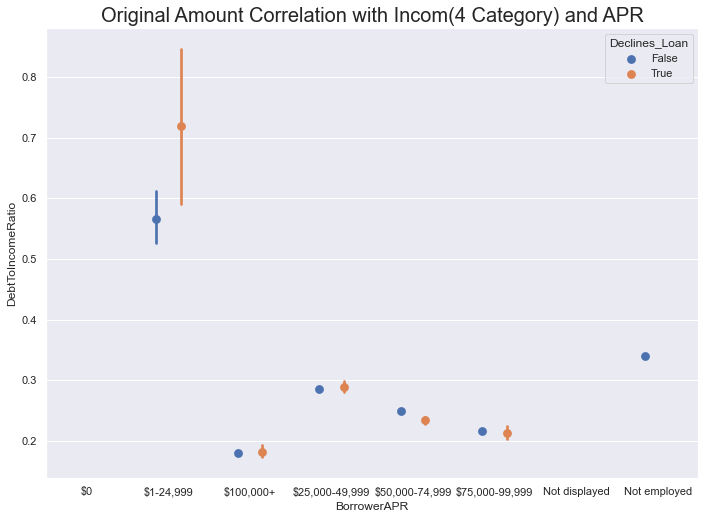

In [664]:
### pointplot 2 : xbar with summary income range (4 catergory)
plt.figure(figsize=(11.69, 8.27))
sb.pointplot(data=df2, y='DebtToIncomeRatio', x='IncomeRange', hue='Declines_Loan', dodge=0.3, linestyles="");
plt.xlabel('BorrowerAPR');
plt.ylabel('DebtToIncomeRatio');
plt.title('Original Amount Correlation with Incom(4 Category) and APR',fontsize=20)

#### Debt to Income ratio are  not much different but only can see the different in the income range under 25k.

## Chargeoff/Defalut Loan VS Prosper Score

### 'income' and 'APR' are the factors that affect the loan status, most declines loan has lower monthly income and higher APR compare to undeclines loan, when Prosper Score is between range 2-6 and income are close or below 4k, there is high probability declines loan will happens

Text(0.5, 1.0, 'Declines/Non-Declines loan correlation with income and prosper score')

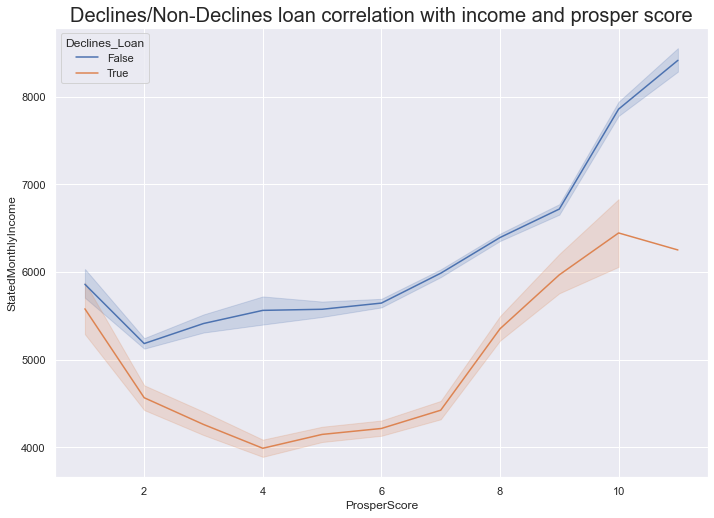

In [656]:
plt.figure(figsize=(11.69, 8.27))
sns.lineplot(
    data=df2, x="ProsperScore", y="StatedMonthlyIncome", hue="Declines_Loan", 
    markers=True, dashes=False, ci=70)
# plt.subplots_adjust(top=0.9)
plt.title('Declines/Non-Declines loan correlation with income and prosper score',fontsize=20)

## Summary and Insights 

#### As I mentioned before there are two major purpose I studying this dataset,  find the correlation causing default and charge off loans, find out the features (who,where,when,what) affects the estimate return.

1.	Here are the key words for most of the loans (CA, Current, Term 36, Income $50000-$74999, 2013, Q2,Q3. ProsperRating(C,D), Occupation: Other)
2.	Answer(When)2013 is the turning point for loan business, the loan listing amount skyrocketing, the major listing Loan (current, complete) go up dramatically ; Q2 and Q3 are more busy quarter compare to q1 and q4 by average.
3.	Answer(Who & Where)Customer’s Job title(who), Which state they living(where) does not affecting their loan status or estimate income.
4.	Answering(What) By average speaking, Bad loan has higher average estimate income than Good Loan. (what). 
5.	Correlation: Income/APR(higher income, lower APR)； Apr/Estimate Return( High APR,Higher Return) ； Term/Return (Longer Term, Higher Return).
6.	Estimate Income ( lower income, higher estimate return, who is your occupation or when you live doesn’t matter)‘income' and 'APR' are the factors that affect the loan status, most declines loan has lower monthly income and higher APR compare to not declines loan, when Prosper Score is between range 2-6 and income are close or below 4k, there is high probability declines loan will happen.

7. Higher Income and Lower APR, more chance not lead to charge off and default loan.  


### Key Insights for Presentation:
There is contradiction between avoids bad loan and maximize estimate return. Because the bad loan has higher estimate average income 0.12 than good loan 0.09. and other plots are verify my finding.  I guess the reason is bank charge more fee or interest for those high APR and low-income customer in order to cover the potential bad loan lost, that causing the bad loan average estimate return higher than good loan. But that doesn’t mean we don’t avoid bad loan, because if bank not handle charge/default loans properly, it will turn to lost, even though estimate return is higher but actually return are badly hurt because the bank spend more resource to handing the loan.


#### i know there are some thought, viewpoint and perspectives are not being consider, also some feature not being used in this report. I also believes there are more better skill or theory that I haven’t been acknowledged. This report will remind and inspire me to keep learning


### Below are the links of resource to help me finish my project

### __[Markdown for Jupyter notebooks Cheatsheet](https://www.ibm.com/support/knowledgecenter/SSHGWL_1.2.3/analyze-data/markd-jupyter.html)__ ,
### __[Python Pandas Value_counts() tricks that make your work more efficient](https://re-thought.com/pandas-value_counts/)__
### __[isin(),str.contains()](https://zhuanlan.zhihu.com/p/29720881)__
### __[Ufuncs](https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9)__
### __[Commenting Python Code](https://stackabuse.com/commenting-python-code/#:~:text=A%20comment%20in%20Python%20starts,a%20multi%2Dline%20comment%20block.)__
### __[Discussion:Storytelling and Success Stories](https://www.visualisingdata.com/2013/04/discussion-storytelling-and-success-stories/)__
### __[Five Rules of Data Exploration](https://www.datameer.com/blog/five-rules-data-exploration/)__
### __[15 Data Exploration techniques to go from Data to Insights](https://towardsdatascience.com/15-data-exploration-techniques-to-go-from-data-to-insights-93f66e6805df)__
### __[The Python Graph Gallery](https://python-graph-gallery.com)__
### __[Graphic Collection](https://www.data-to-viz.com)__
### __[5 Python Libraries for Creating Interactive Plots](https://mode.com/blog/python-interactive-plot-libraries/)__

In [496]:
# pip install RISE

In [ ]:
# df2.shape

In [ ]:
# !jupyter nbconvert exploration_show.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
!jupyter nbconvert exploration_template-Copy3.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook exploration_template-Copy3.ipynb to slides
[NbConvertApp] Writing 1411298 bytes to exploration_template-Copy3.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/exploration_template-Copy3.slides.html
Use Control-C to stop this server
